<div style="display:flex; border-bottom:4px solid gray; background-color: white; padding: 10px;">
    <div>
        <h2 style="margin:10px 0px 0px 0px;">Master's Thesis - Spring 2023</h2>
        <h4 style="margin:10px 10px 10px 0px;"><i>Artificial Intelligence - Data Science</i></h4>
    </div>
    <img src="img/UrFU.png" style="width:350px; height:150px; margin-right: 25px;" align='right' />
</div>
<h4 style="margin-top:10px; text-align:right; font-size: 20px; margin-right: 25px;"> Jarno Matarmaa - 05.2023 - Version-2.0-github</h4>

# Sport Activity Classification using Standard CML Models and Time Series Analysis
### Part (1/3), Standard CML classification

**TASKS**
* [04.05.2023-11:30] All completed

**CHANGE LOG**
* [04.05.2023-11:30] Functions created for all the classification task and hyperparameter optimization
* [04.05.2023-11:30] Visualization functions created for bar and violin plots

**ISSUES**
* [04.05.2023-11:30] File executed successfully! Hyperparameter tuning disabled. Reading data from the local files.

---

<a id="0"></a> <br>
## I - Table of Contents

#### [1 - Data import and preview](#1)
* [1A - Libraries](#11)
* [1B - Loading the data](#12)
* [1C - Exploring the data](#13)

#### [2 - Standard CML Classification (S-CML)](#2)
* [2A - SKLearn Classifiers](#21)
* [2B - Classification in Standard data](#22)
* [2C - Classification in PCA data](#23)
* [2D - Model hyperparameter optimization](#24)
* [2E - Classification with optimal hyperparameters](#24)
* [2F - Summary analysis](#24)

<a id="1"></a> <br>
## [▲](#0) 1 - Data import and preview

<a id="11"></a> <br>
###  [▲](#1) 1A - Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sn
import matplotlib.pyplot as plt
from time import time, mktime, ctime
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

C:\Users\jarno\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
cmap = sn.color_palette("muted", 10)
palette ={"Running": cmap[1], "Cycling": cmap[7], "Walking": cmap[3], "R-Skiing": cmap[0],"Skiing": cmap[9]}
cmap

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [4]:
plt.style.use('./styles/plotstyles.mplstyle')
THEMA_COLOR = cmap[9]
#plt.style.use('default')

<div style="display: block; padding: 15px; background-color: lightgreen; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 26px;"><b>Start execution timer</b></h3>
</div>

In [5]:
run_start = datetime.datetime.now()

<a id="12"></a> <br>
###  [▲](#1) 1B - Loading the data

In [6]:
# Data root folder path
root = "C:/Users/jarno/OneDrive - TUNI.fi/4_JEKA/STUDIES/Design Workshop/SemesterReport-Spring2022/Datasets/SAC/"

In [7]:
DF_sports = pd.read_csv(root + 'FIX_activities_csv_220.csv', delimiter=';')
DF_sports_std = pd.read_csv(root + 'activities220_std.csv', delimiter=';')
DF_sports_pca = pd.read_csv(root + 'activities220_pca.csv', delimiter=';')
DF_sports_tsne = pd.read_csv(root + 'activities220_tsne.csv', delimiter=';')

# Feature type information will be lost when saving-reading csv, therefore we need to set target as category-type again
DF_sports_pca['target_names'] = DF_sports_pca['target_names'].astype('category')
DF_sports_std['target_names'] = DF_sports_std['target_names'].astype('category')

class_names = ['Cycling', 'R-Skiing', 'Running', 'Skiing', 'Walking']

<a id="13"></a> <br>
###  [▲](#1) 1C - Exploring the data

#### Original data (cleaned)

In [8]:
DF_sports.shape # Shape with target column

(213, 22)

In [9]:
DF_sports.head()

,Activity Type,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,...,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,1.87,143,877.0,168.0,194.0,2.6,183.0,239.0,5.07,...,15.0,1.12,6.3,6.3,243.0,2,570.0,877.0,255.0,267.0
1,Cycling,34.45,1521,8542.0,150.0,189.0,3.3,0.0,0.0,14.50,...,256.0,0.00,0.0,0.0,0.0,7,7163.0,8800.0,235.0,301.0
2,Running,2.00,163,928.0,138.0,165.0,2.1,143.0,256.0,7.45,...,20.0,0.93,7.1,6.5,338.0,2,826.0,928.0,301.0,321.0
3,Running,9.58,672,3940.0,143.0,187.0,2.9,145.0,229.0,6.51,...,52.0,1.02,7.2,6.7,300.0,10,3345.0,3940.0,285.0,297.0
4,Running,13.59,783,7222.0,121.0,172.0,2.2,126.0,238.0,8.52,...,78.0,0.91,7.3,6.3,365.0,14,6256.0,7222.0,265.0,306.0


In [10]:
DF_sports.describe()

,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,...,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,18.426573,812.262911,4710.629108,135.953052,166.821596,2.410798,105.089202,195.948357,13.164678,23.557465,...,155.464789,1.307324,2.200469,2.038498,89.643192,8.169014,3850.103286,4840.333333,115.859155,153.446009
std,17.249274,533.962851,2706.226829,34.775393,37.979961,1.572921,55.712508,84.888674,6.280198,32.177730,...,145.866264,0.956825,3.474292,3.200298,141.747498,5.030058,2828.592037,2940.053035,54.793600,54.487000
min,0.500000,75.000000,647.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.775148,1.480000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,647.000000,-3.000000,51.000000
25%,8.700000,478.000000,3064.000000,127.000000,164.000000,0.000000,80.000000,204.000000,7.090000,3.550000,...,57.000000,0.700000,0.000000,0.000000,0.000000,4.000000,2111.000000,3064.000000,92.000000,134.000000
50%,13.480000,759.000000,4431.000000,147.000000,180.000000,3.000000,110.000000,232.000000,13.500000,25.500000,...,113.000000,0.970000,0.000000,0.000000,0.000000,8.000000,3749.000000,4554.000000,108.000000,145.000000
75%,24.340000,1043.000000,5774.000000,157.000000,185.000000,3.500000,154.000000,246.000000,17.400000,39.900000,...,239.000000,2.270000,6.600000,6.500000,263.000000,10.000000,5154.000000,5893.000000,123.000000,160.000000
max,128.950000,3698.000000,19789.000000,180.000000,199.000000,5.000000,190.000000,256.000000,29.000000,406.000000,...,992.000000,3.420000,9.400000,8.200000,426.000000,34.000000,19302.000000,22456.000000,344.000000,397.000000


**Scatter plot**

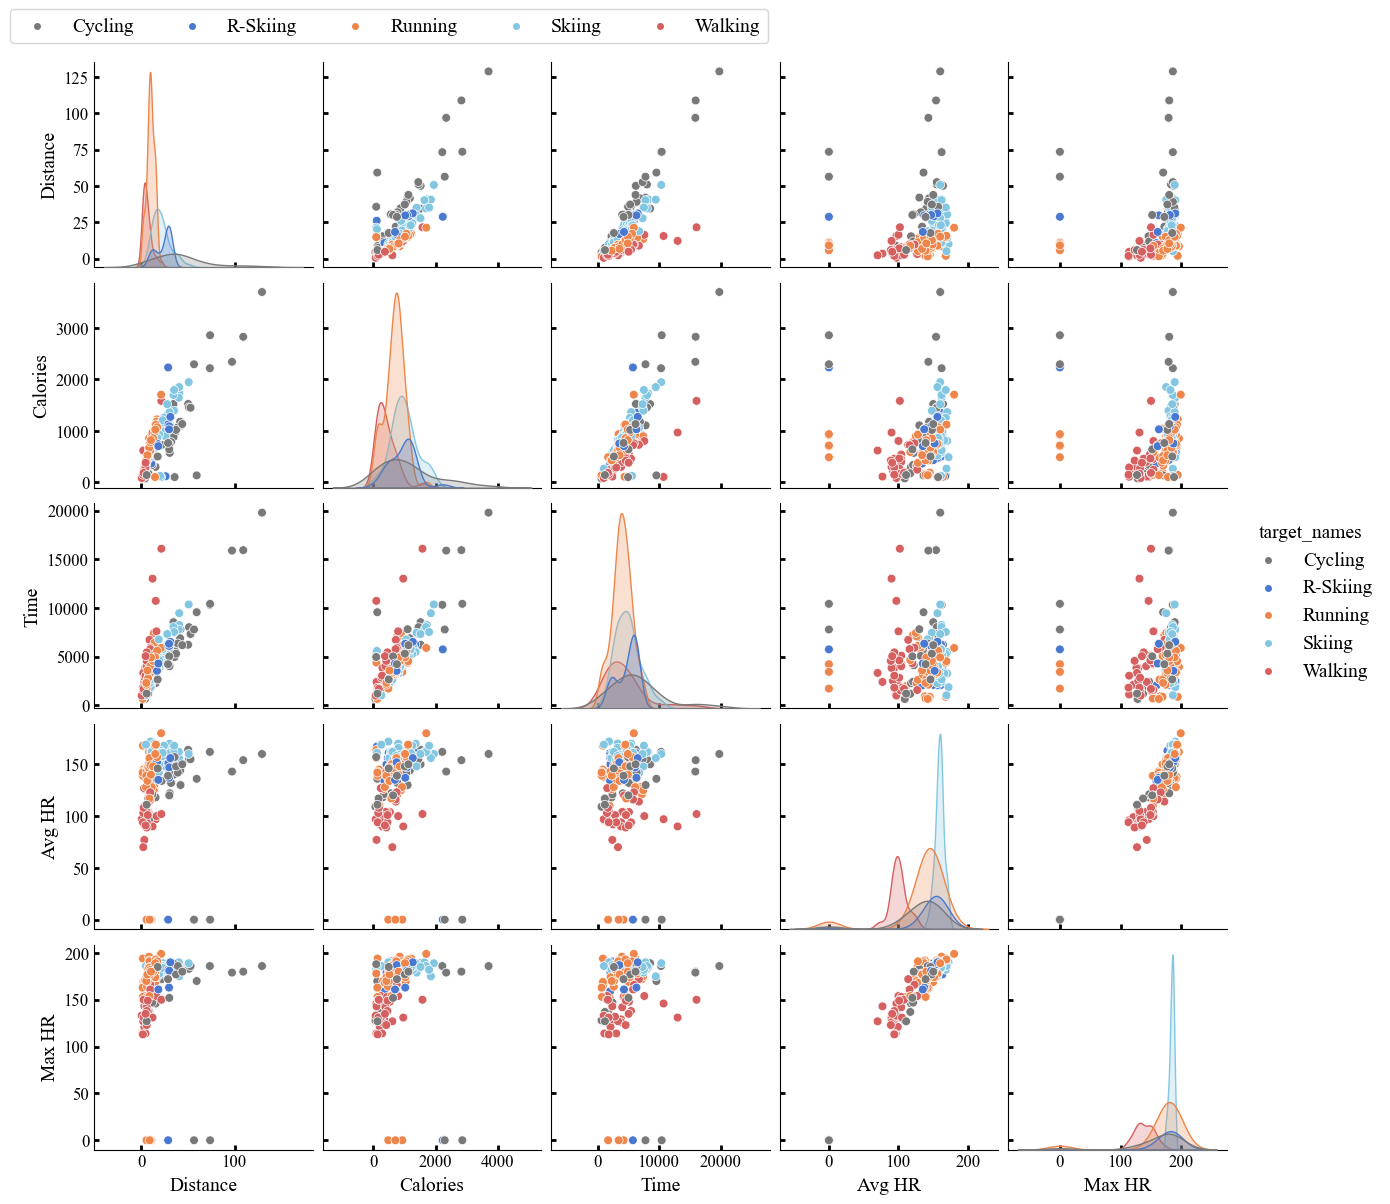

In [11]:
classifier = 'target_names'
DF_sports_temp = DF_sports.copy()
DF_sports_temp['target_names'] = DF_sports_std.target_names
pairplot_columns = list(DF_sports.columns[1:6].values)
pairplot_columns.append(classifier)

plot_kws = {"s":40, "alpha":1.0,'lw':0.5}
g = sn.pairplot(DF_sports_temp[pairplot_columns], hue=classifier, plot_kws=plot_kws, palette=palette)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=5)
g.fig.subplots_adjust(top=0.95, bottom=0.08)

**Feature correlation**

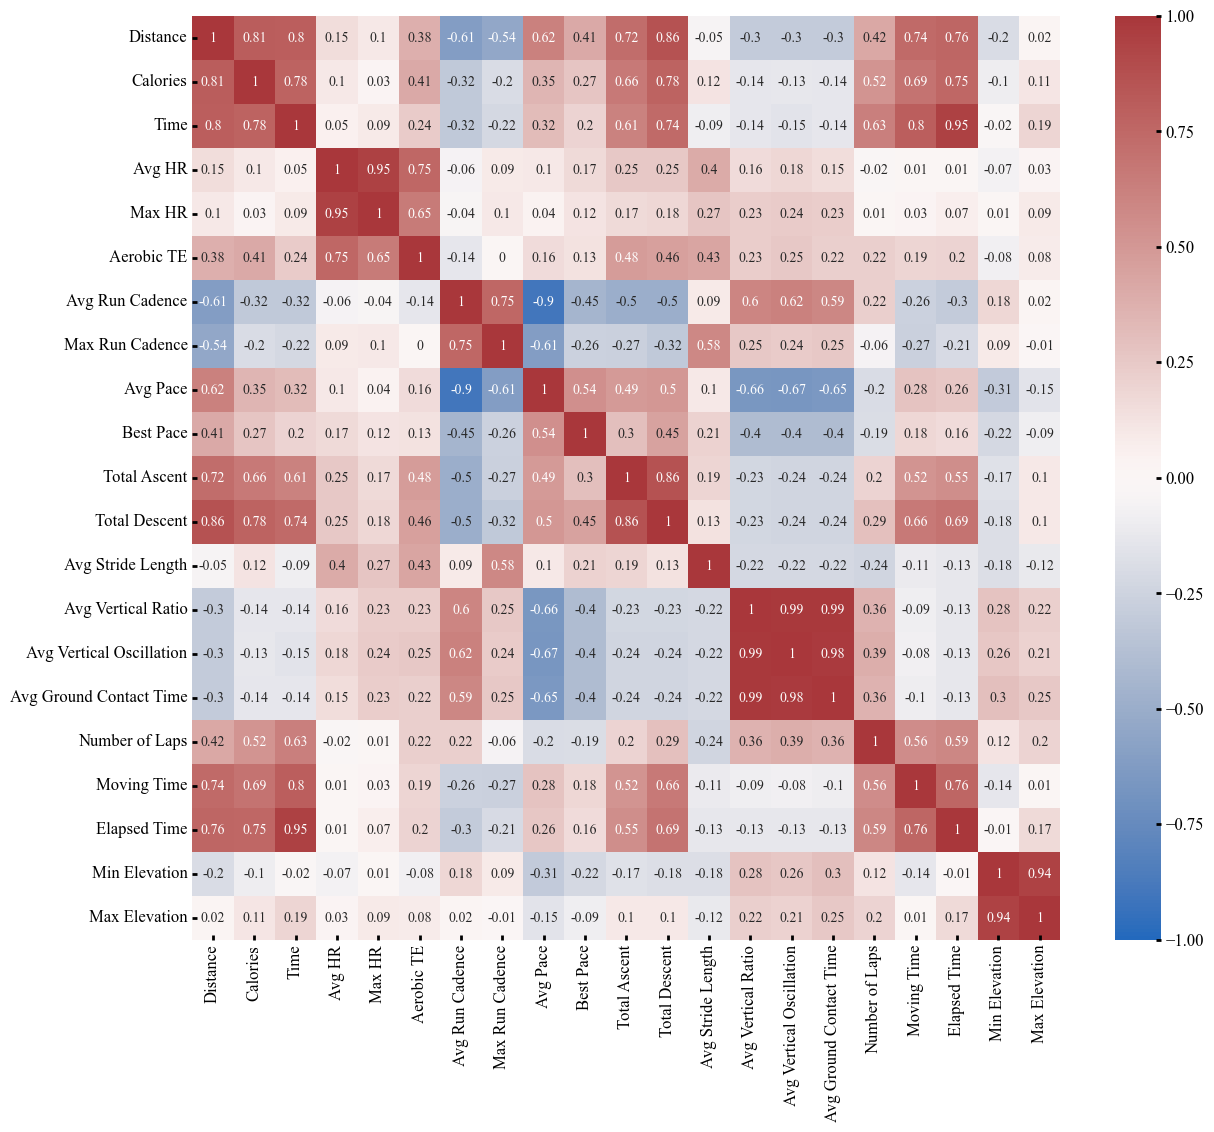

In [12]:
corr_matrix = DF_sports.iloc[:,1:].corr().round(2)
plt.figure(figsize=(14,12))
sn.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', annot_kws={"size":10})
plt.show()

In [13]:
DF_sports

,Activity Type,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,...,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,1.87,143,877.0,168.0,194.0,2.6,183.0,239.0,5.07,...,15.0,1.12,6.3,6.3,243.0,2,570.0,877.0,255.0,267.0
1,Cycling,34.45,1521,8542.0,150.0,189.0,3.3,0.0,0.0,14.50,...,256.0,0.00,0.0,0.0,0.0,7,7163.0,8800.0,235.0,301.0
2,Running,2.00,163,928.0,138.0,165.0,2.1,143.0,256.0,7.45,...,20.0,0.93,7.1,6.5,338.0,2,826.0,928.0,301.0,321.0
3,Running,9.58,672,3940.0,143.0,187.0,2.9,145.0,229.0,6.51,...,52.0,1.02,7.2,6.7,300.0,10,3345.0,3940.0,285.0,297.0
4,Running,13.59,783,7222.0,121.0,172.0,2.2,126.0,238.0,8.52,...,78.0,0.91,7.3,6.3,365.0,14,6256.0,7222.0,265.0,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Inline Skating,29.73,1029,6325.0,137.0,163.0,2.4,91.0,209.0,16.90,...,142.0,2.13,0.0,0.0,0.0,10,6230.0,6325.0,95.0,139.0
209,Cycling,30.00,640,5029.0,120.0,152.0,1.8,0.0,0.0,21.50,...,255.0,0.00,0.0,0.0,0.0,6,4859.0,5029.0,88.0,141.0
210,Inline Skating,18.34,702,4294.0,135.0,161.0,2.2,84.0,204.0,15.40,...,113.0,2.38,0.0,0.0,0.0,7,4049.0,4294.0,121.0,151.0
211,Cycling,28.68,764,4226.0,139.0,172.0,2.9,0.0,0.0,24.40,...,142.0,0.00,0.0,0.0,0.0,6,4197.0,4226.0,129.0,174.0


**Category distribution**

In [14]:
sport_counts = pd.DataFrame(data=DF_sports_std['target_names'].value_counts())
#sport_counts

NOTE: If you want fixed label names you may use `DF_sports_std['target_names']`

Text(0, 0.5, 'Category')

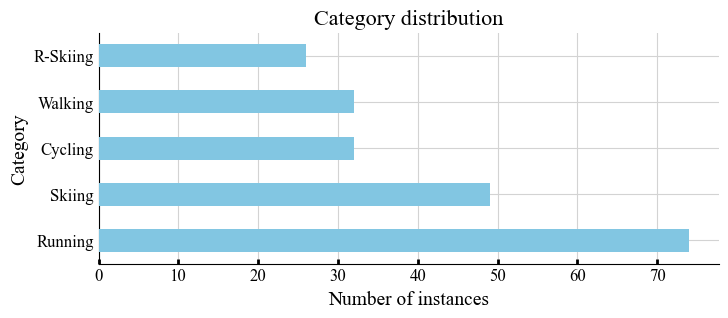

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
sport_counts.plot(kind='barh', color=THEMA_COLOR, zorder=3,
                  width=0.5,
                  title='Category distribution',
                  grid=True, legend=False, ax=ax)
ax.set_xlabel('Number of instances')
ax.set_ylabel('Category')

#### Standard data

In [16]:
DF_sports_std.head()

,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,...,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation,target_names
0,-0.962103,-1.256341,-1.419933,0.923712,0.717284,0.120570,1.401738,0.508349,-1.291957,-0.658133,...,-0.196238,1.182741,1.334732,1.084450,-1.229319,-1.162356,-1.351224,2.545345,2.088966,Running
1,0.931122,1.330442,1.419096,0.404885,0.585326,0.566651,-1.890720,-2.313736,0.213125,0.291026,...,-1.369533,-0.634850,-0.638472,-0.633904,-0.232953,1.173977,1.349974,2.179479,2.714438,Cycling
2,-0.954549,-1.218797,-1.401043,0.059001,-0.048075,-0.198058,0.682075,0.709083,-0.912095,-0.595521,...,-0.395279,1.413546,1.397374,1.756235,-1.229319,-1.071638,-1.333836,3.386837,3.082363,Running
3,-0.514075,-0.263302,-0.285432,0.203119,0.532542,0.311748,0.718058,0.390270,-1.062125,-0.654707,...,-0.300996,1.442397,1.460015,1.487521,0.364866,-0.178991,-0.306952,3.094144,2.640853,Running
4,-0.281053,-0.054932,0.930183,-0.431002,0.136667,-0.134333,0.376218,0.496541,-0.741317,-0.605177,...,-0.416231,1.471247,1.334732,1.947163,1.161959,0.852567,0.811984,2.728278,2.806419,Running


**Box plot**

<Axes: >

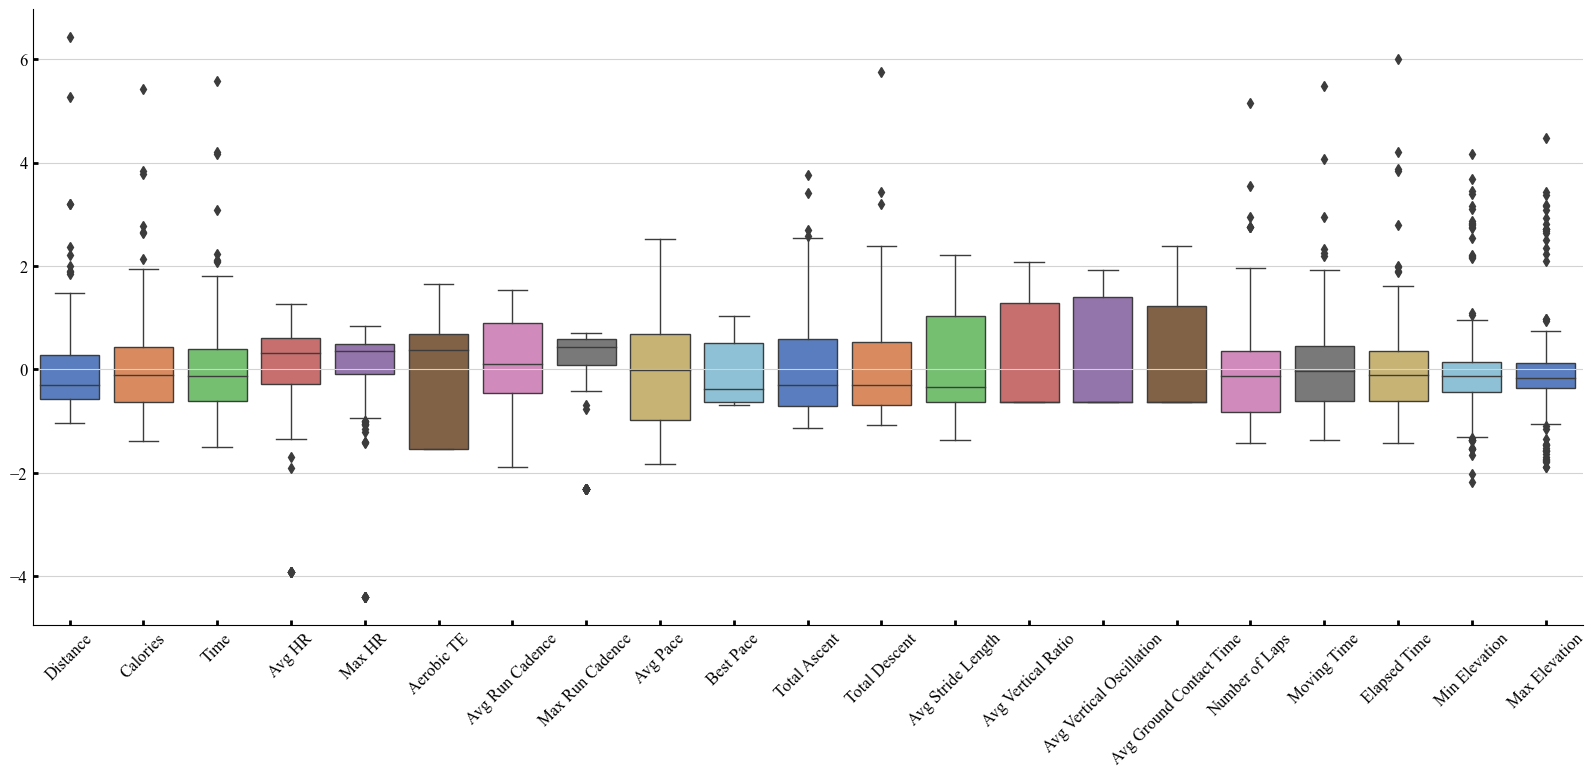

In [17]:
# Some tricky features are excluded
box_columns = DF_sports.columns.drop(['Activity Type'])
data = DF_sports_std[box_columns]
#print(max(data['Best Pace']))

# Let's remove some outliers to improve visualization scale (There is one in 'Best Pace' column)
q = data["Best Pace"].quantile(0.99)
data = data[data['Best Pace'] < q]
#print(max(data['Best Pace']))

# Making box plots
plt.figure(figsize=(20,8))
plt.grid()
plt.xticks(rotation=45)
sn.boxplot(data=data, palette=cmap, showfliers=True)

#### PCA data

In [18]:
DF_sports_pca.head()

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,...,pca-13,pca-14,pca-15,pca-16,pca-17,pca-18,pca-19,pca-20,pca-21,target_names
0,-4.345014,1.508386,-0.830588,2.809753,0.900403,0.122788,0.165131,-0.360229,-0.180933,-0.447192,...,0.478556,-0.219184,-0.515010,0.138718,0.191343,-0.051418,-0.069727,-0.129937,-0.046102,Running
1,3.505444,1.049004,1.479421,3.851245,0.488125,-0.779498,-0.093617,-0.207398,-0.091536,-0.127072,...,-0.899918,0.384480,-0.040731,-0.234222,0.420096,0.174396,-0.068736,0.011368,0.058669,Cycling
2,-4.391073,1.666658,0.319578,3.798488,1.401576,0.968329,0.057837,-0.306736,-0.796707,0.007254,...,0.487543,-0.313379,-0.271378,-0.076387,-0.199707,-0.051243,-0.225500,0.157423,-0.109690,Running
3,-2.660323,3.113681,0.621812,2.823563,1.300251,0.084049,0.183699,0.344900,-0.520372,-0.091461,...,0.021207,-0.036529,-0.170881,-0.057136,-0.131614,-0.101717,0.094007,-0.096269,-0.038592,Running
4,-1.375742,3.803331,1.959250,2.142313,1.454609,-0.164875,0.495044,0.212530,-1.115000,0.402679,...,-0.103563,0.086555,0.004353,-0.211647,-0.070128,0.115430,-0.025184,0.264721,-0.049413,Running


**We also need to repeat PCA transform in order to visualize some data**

In [19]:
DF_sports_std_copy = DF_sports_std.iloc[:,:-1].copy()
comb_num = DF_sports_std_copy.shape[1]
pca = PCA(n_components=comb_num)
pca_result = pca.fit_transform(DF_sports_std_copy)
pca_names = ['pca-' + str(x + 1) for x in range(comb_num)]

In [20]:
EV = pca.explained_variance_ratio_
print('Explained Varience by principle component: {}'.format(EV))

Explained Varience by principle component: [3.45688861e-01 2.09234433e-01 1.39332027e-01 8.55243847e-02
 7.41315251e-02 3.54699789e-02 3.16286048e-02 2.04854146e-02
 1.32730709e-02 1.23032645e-02 9.92478383e-03 6.89618449e-03
 4.83147613e-03 3.24387897e-03 2.37161547e-03 1.85574812e-03
 1.66703259e-03 8.99142930e-04 6.62742611e-04 4.51824948e-04
 1.24005889e-04]


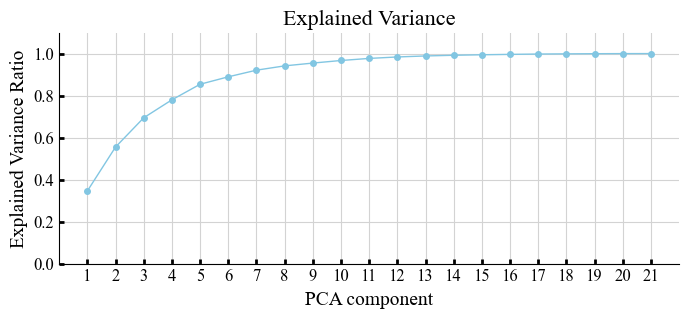

In [21]:
fig = plt.figure(figsize=(8,3))
plt.plot(np.array(range(len(EV))) + 1, np.cumsum(EV), 'o-', color=THEMA_COLOR)
plt.style.use('./styles/plotstyles.mplstyle')
plt.title('Explained Variance')
plt.xticks(np.array(range(len(EV))) + 1)
plt.xlabel('PCA component')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1.1);
plt.grid()

In [22]:
DF_sports_pca

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,...,pca-13,pca-14,pca-15,pca-16,pca-17,pca-18,pca-19,pca-20,pca-21,target_names
0,-4.345014,1.508386,-0.830588,2.809753,0.900403,0.122788,0.165131,-0.360229,-0.180933,-0.447192,...,0.478556,-0.219184,-0.515010,0.138718,0.191343,-0.051418,-0.069727,-0.129937,-0.046102,Running
1,3.505444,1.049004,1.479421,3.851245,0.488125,-0.779498,-0.093617,-0.207398,-0.091536,-0.127072,...,-0.899918,0.384480,-0.040731,-0.234222,0.420096,0.174396,-0.068736,0.011368,0.058669,Cycling
2,-4.391073,1.666658,0.319578,3.798488,1.401576,0.968329,0.057837,-0.306736,-0.796707,0.007254,...,0.487543,-0.313379,-0.271378,-0.076387,-0.199707,-0.051243,-0.225500,0.157423,-0.109690,Running
3,-2.660323,3.113681,0.621812,2.823563,1.300251,0.084049,0.183699,0.344900,-0.520372,-0.091461,...,0.021207,-0.036529,-0.170881,-0.057136,-0.131614,-0.101717,0.094007,-0.096269,-0.038592,Running
4,-1.375742,3.803331,1.959250,2.142313,1.454609,-0.164875,0.495044,0.212530,-1.115000,0.402679,...,-0.103563,0.086555,0.004353,-0.211647,-0.070128,0.115430,-0.025184,0.264721,-0.049413,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1.652851,-0.511258,-0.141000,-0.753379,0.609814,-0.328522,0.454971,0.595361,-0.499367,-0.034716,...,-0.045070,0.131119,-0.308085,-0.084644,-0.015675,0.063859,-0.129864,-0.002707,0.031539,R-Skiing
209,2.404729,-1.862364,1.094830,1.341929,-2.024047,0.267595,-0.233070,-0.431147,-0.019320,-0.228203,...,-0.051738,0.196752,0.151302,-0.003223,0.071401,-0.000791,0.014146,-0.000412,-0.018575,Cycling
210,0.269462,-1.239733,-0.497305,-0.004370,0.777044,-0.108224,0.142756,0.567453,-0.473620,-0.057943,...,0.067994,0.409619,-0.087451,-0.054447,0.001740,-0.049664,-0.000857,-0.028292,0.011151,R-Skiing
211,1.928728,-1.648104,0.466805,2.416683,-1.851619,-0.249617,-0.062504,0.627940,-0.225449,-0.039294,...,-0.235177,-0.294760,0.037035,0.081292,0.056161,0.056671,-0.040744,0.008605,0.012945,Cycling


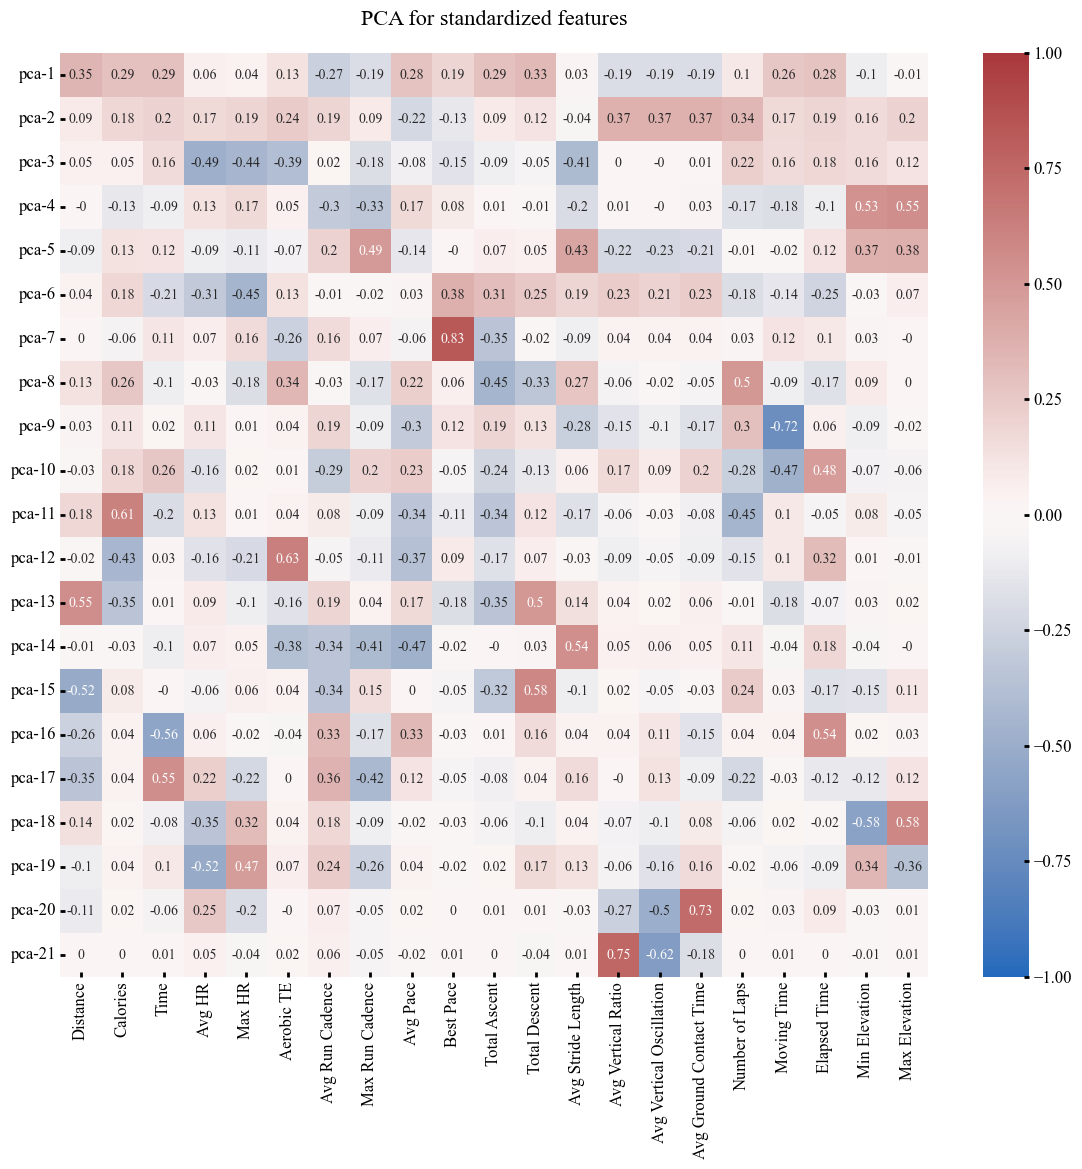

In [23]:
C = pca.components_.round(2)
column_names = DF_sports_std.columns[:-1]

plt.figure(figsize=(14,12))
ax = sn.heatmap(C.astype(float), annot=True, 
                vmax=1, vmin=-1, center=0, 
                cmap='vlag',
                annot_kws={"size":10})
ax.set_xticks(np.arange(0, C.shape[1])+0.5, column_names, rotation=90)
ax.set_yticks(np.arange(0, C.shape[0])+0.5, pca_names, rotation=0)
ax.set_title('PCA for standardized features', pad=20)
plt.show()

**PCA vs. Standard**

Text(0.5, 1.0, 'Standard features [Distance, Calories]')

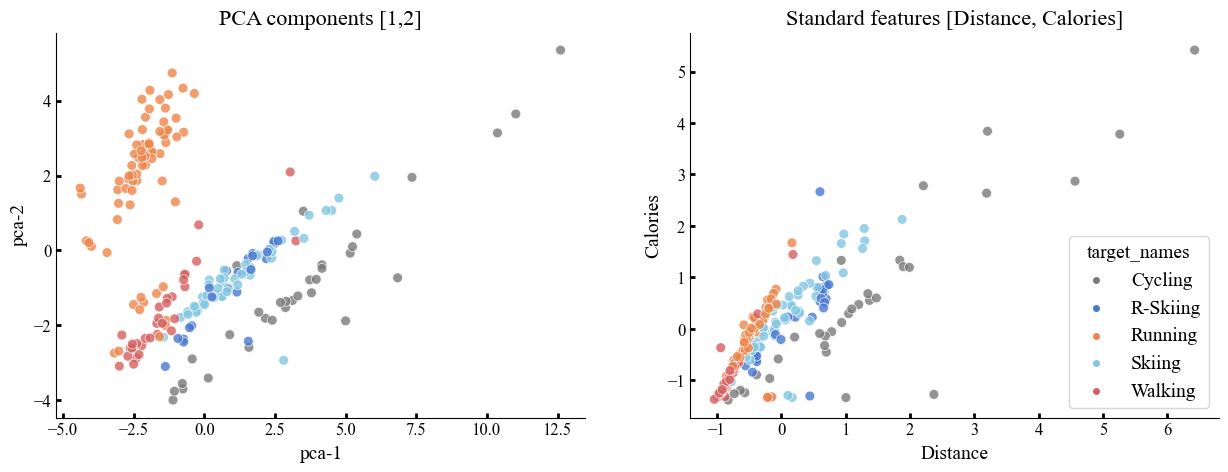

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sn.scatterplot(x="pca-1", y="pca-2",
                hue='target_names', 
                data=DF_sports_pca,
                alpha=0.8, palette=palette,
                s=50, ax=ax[0]
);
ax[0].set_title('PCA components [1,2]')
ax[0].get_legend().remove()
sn.scatterplot(x=column_names[0], y=column_names[1],
                hue='target_names',
                data=DF_sports_std,
                alpha=0.8, palette=palette,
                s=50, ax=ax[1]
);
ax[1].set_title('Standard features [Distance, Calories]')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

**PCA component visualization** (5 most important features)

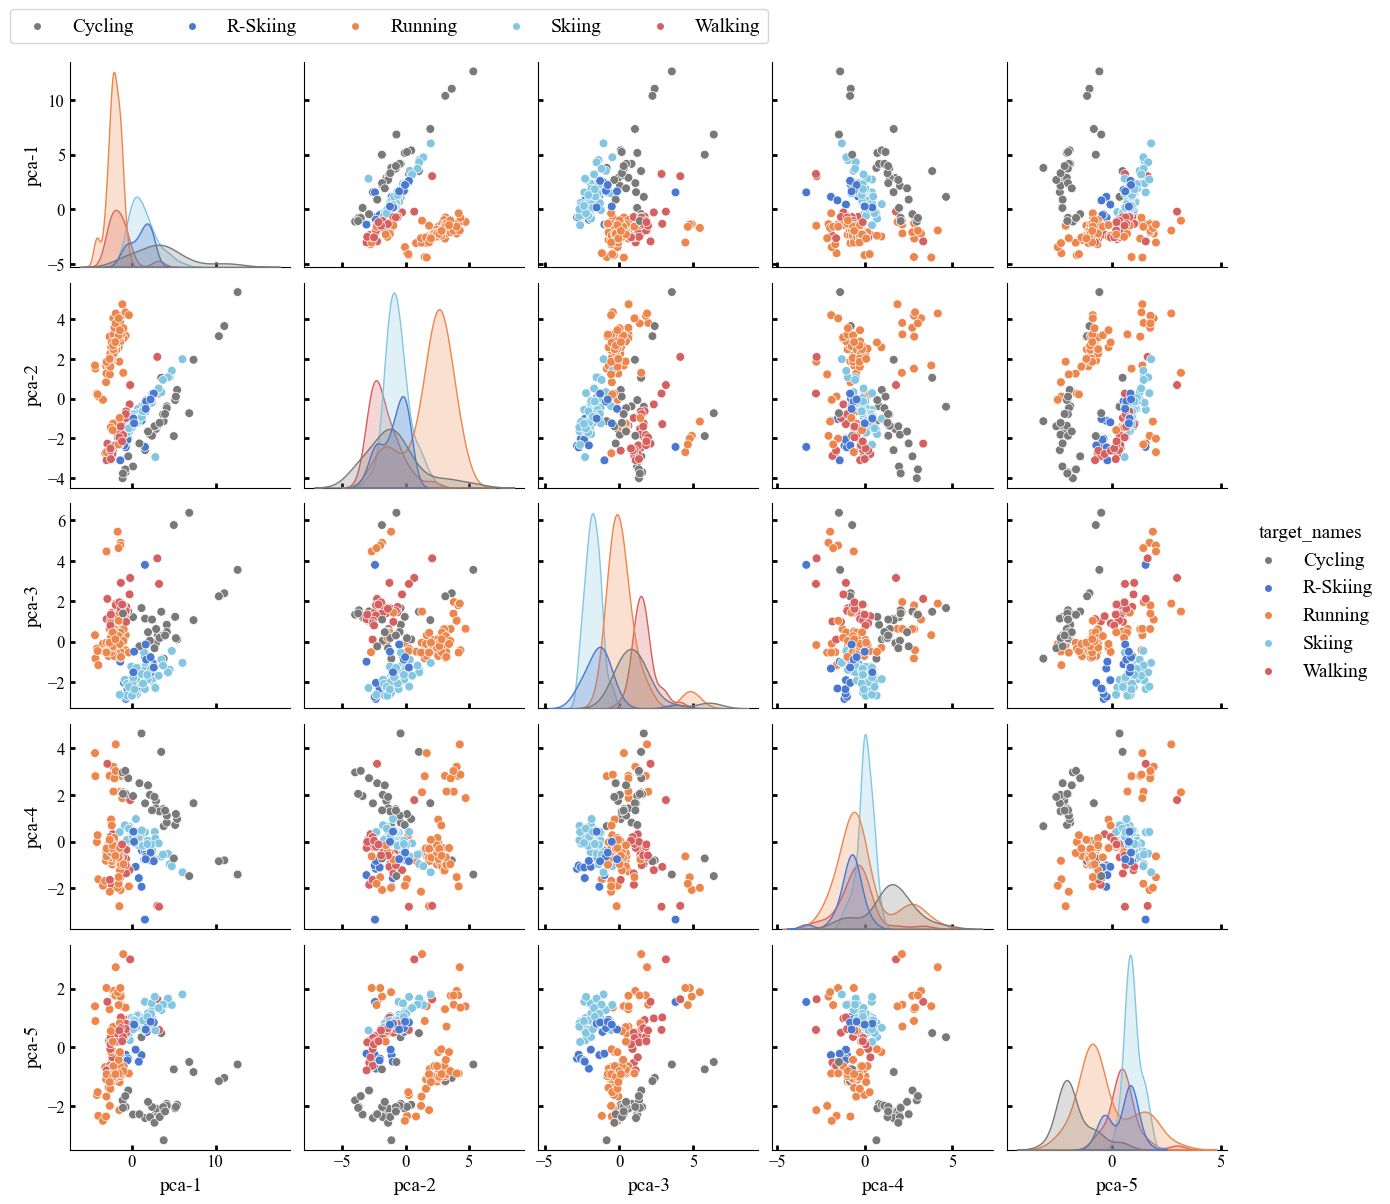

In [25]:
classifier = 'target_names'
pairplot_columns = pca_names[:5]
if classifier not in pairplot_columns:
    pairplot_columns.append(classifier)

plot_kws = {"s":40, "alpha":1.0,'lw':0.5}
g = sn.pairplot(DF_sports_pca[pairplot_columns], hue=classifier, plot_kws=plot_kws, palette=palette)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=5)
g.fig.subplots_adjust(top=0.95, bottom=0.08)

#### T-Distributed Stochastic Neighbor Embedding (tSNE) 

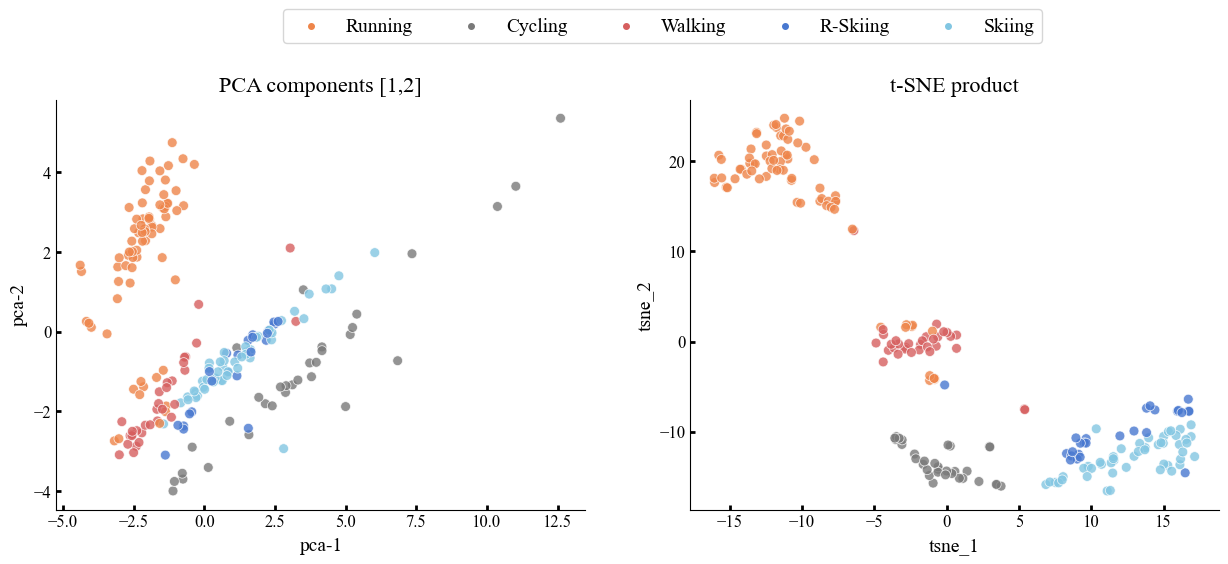

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
cmap = sn.color_palette("muted", 10)
palette ={"Running": cmap[1], "Cycling": cmap[7], "Walking": cmap[3], "R-Skiing": cmap[0],"Skiing": cmap[9]}

# PCA data visualization (two main components)
sn.scatterplot(x="pca-1", y="pca-2",
                hue='target_names', 
                data=DF_sports_pca,
                alpha=0.8, palette=palette,
                s=50, ax=ax[0]
);
ax[0].set_title('PCA components [1,2]')
ax[0].get_legend().remove()

# t-SNE data visualization
sn.scatterplot(x='tsne_1', y='tsne_2', 
               hue='target_names', 
               data=DF_sports_tsne, 
               alpha=0.8,
               palette=palette,
               s=50, ax=ax[1]
);
ax[1].set_title('t-SNE product')
ax[1].get_legend().remove()

handles, labels = ax[1].get_legend_handles_labels()
fig.subplots_adjust(top=0.90, bottom=0.08)
fig.legend(labels=labels, handles=handles, bbox_to_anchor=(0.27, 1.1), loc="upper left", ncol=5)

<a id="2"></a> <br>
## [▲](#0) 2 - Standard CML Classification (S-CML)

<a id="21"></a> <br>
###  [▲](#2) 2A - Sklearn classifiers and functions

**Libraries**

In [27]:
# ML models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Score metrics etc.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
#from pretty_confusion_matrix import pp_matrix_from_data, pp_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate

import matplotlib.gridspec as gridspec

# Because warnings are sometimes unuseful
import warnings
warnings.filterwarnings("ignore")

**Functions**

In [28]:
def splits(X, y, rs):
    # To keep code more clean and consistent
    return train_test_split(X, y, test_size=0.3, 
                                  shuffle=True, 
                                  random_state=rs, # Need to be varied
                                  stratify=y
                           )

In [29]:
def classify(classifiers, X, y, n_iter):

    fr = pd.DataFrame(columns=['Model','Mean Score','Max','Min','score_std',
                               'mean_train_time','mean_score_time','total_time'])
    results = {}
    ITER = n_iter

    # Going through the models
    for name, classifier in classifiers.items():
        # Lists for the values to calculate average
        scores = np.array([])
        train_times = np.array([])
        score_times = np.array([])
        # Reset the random state value
        random_state = 0
        # Computing ITER times
        for i in range(0,ITER):
            # Create train-test data splits
            X_train, X_test, y_train, y_test = splits(X, y, random_state)
            # Compute values
            start = time()
            classifier.fit(X_train, y_train)
            train_time = time() - start
            start = time()
            score = classifier.score(X_test, y_test) # Hold-out validation
            score_time = time()-start
            # Add values in to lists
            scores = np.append(scores, score)
            train_times = np.append(train_times, train_time)
            score_times = np.append(score_times, score_time)
            random_state+=2

        #print(name, scores)
        results[name] = {'scores' :scores, 'train_times': train_times, 'score_times': score_times}

        # Computing average values
        avg_score = np.average(scores);
        avg_train_t = np.average(train_times);
        avg_score_t = np.average(score_times);
        max_ = np.max(scores)
        min_ = np.min(scores)
        score_std = np.std(scores)
        score_row = pd.DataFrame({'Model':name,
                                'Mean Score':avg_score,
                                'Max':max_,
                                'Min': min_,
                                'score_std': score_std,
                                'mean_train_time':avg_train_t,
                                'mean_score_time':avg_score_t,
                                'total_time':avg_train_t+avg_score_t}, index=[10])
        fr = pd.concat([fr,score_row], ignore_index=True)
    return fr, results

In [30]:
def classify_cf(dstype: str, classifiers: dict, data: tuple, rs=0, results=None, confmatrix=True):

    X_train, X_test, y_train, y_test = splits(data[0], data[1], rs)
    # Removes all previously performed Standard data model evaluations
    if results is None:
        model_scores = pd.DataFrame(columns=['Model','Datatype','Accuracy','F1'])
    elif dstype == 'Standard':
        model_scores = results[results.Datatype=='PCA']
    else:
        model_scores = results[results.Datatype=='Standard']

    # Setting dimension for plotting
    w = 3
    n = len(classifiers) # 13//2 = 6 --> 13/2 = 6.5
    h = n//w + 1
    w_fig = 20
    h_fig = h * (w_fig//3)

    fig = plt.figure(figsize=(w_fig, h_fig))

    i = 1
    for name, clf in list(classifiers.items()):
        # Fit data and make predictions
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Accuracy and F1 scores
        acc = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='micro')
        
        # Save results into dataframe
        score_row = pd.DataFrame({'Model':name,'Datatype':dstype,'Accuracy':acc, 'F1':f1}, index=[10])
        model_scores = pd.concat([model_scores, score_row], ignore_index=True)
        
        # Print some scores and plot confusion matrix
        print("➥ \033[1m%s\033[0m: acc: %s mse: %s ▼"%(clf, acc, mse))
        if confmatrix:
            cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
            cm_norm = cm.apply(lambda x: x/x.sum(), axis = 1)
            fig.add_subplot(h,w,i, title=name)
            #sn.set(font_scale=1.1) # for label size
            sn.heatmap(cm_norm, annot=True, 
                       yticklabels=class_names, 
                       xticklabels=class_names,
                       fmt='.1%',
                       cmap='Blues')
        
        i+=1 # Do not remove this, it will help us to organize subplots

    if confmatrix: plt.show()

    return model_scores

In [31]:
def optimize_classify(classifiers, params, iters):

    model_opt_scores_gscv = pd.DataFrame(columns=['Model','Hyperparameters','Mean Score',
                                                         'Best Score','Min Score','Score std',
                                                         'Train time','Score time','Total time'])
    for data in datasets:
        
        print('GRID SEARCH CROSS VALIDATION for %s' % data['dstype'])
        
        for name, clf, p in zip(classifiers.keys(), classifiers.values(), params.values()):
            print('\033[1m➥%s\033[0m ▼'% clf) # Bold text printing
            scores = np.array([])
            train_times = np.array([])
            score_times = np.array([])
            df_best_params = pd.DataFrame(columns=['Best hyperparameters'])
            # GridSearchCV stuff
            clf_search = GridSearchCV(estimator=clf,
                                        refit=True,
                                        verbose=0,
                                        param_grid=p,
                                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=24))
            
            # Iterative prediction for a single model
            for i in range(0,iters):
                # Create train-test data splits
                X_train, X_test, y_train, y_test = splits(data['X'], data['y'], 2*i+2)
                clf_search.fit(X_train, y_train)
                clf_best = clf_search.best_estimator_
                
                # Store best hyperparameters for analysis
                best_params = pd.Series({'Best hyperparameters': clf_search.best_params_}).to_frame().T
                df_best_params = pd.concat([df_best_params, best_params], axis=0, ignore_index=True)
                
                # Get some time values
                gscv_res = pd.DataFrame(data=clf_search.cv_results_).sort_values(by='rank_test_score').iloc[0]
                
                # Compute values
                clf_best.fit(X_train, y_train)
                train_time = gscv_res['mean_fit_time']
                
                # Test score used in evaluation
                score = clf_best.score(X_test, y_test)
                score_time = gscv_res['mean_score_time']
                
                # Add values in to lists
                scores = np.append(scores, score)
                train_times = np.append(train_times, train_time)
                score_times = np.append(score_times, score_time)
            
            print(scores)
            hyperparam_mode = df_best_params['Best hyperparameters'].mode()[0]
            print('Mode: ' + str(hyperparam_mode))
            
            # Computing average values
            avg_score = np.average(scores);
            avg_train_t = np.average(train_times);
            avg_score_t = np.average(score_times);
            max_ = scores.max()
            min_ = scores.min()
            score_std = np.std(scores)
            score_row = pd.Series({'Model':name,
                                'Hyperparameters': hyperparam_mode,
                                'Mean Score':avg_score,
                                'Best Score':max_,
                                'Min Score': min_,
                                'Score std': score_std,
                                'Train time':avg_train_t,
                                'Score time':avg_score_t,
                                'Total time':avg_train_t+avg_score_t,}).to_frame().T

            model_opt_scores_gscv = pd.concat([model_opt_scores_gscv, score_row], axis=0, ignore_index=True)
            
            #print (classification_report(y_test, y_pred, target_names=class_names))
        
        print('\n')
        
    print('\n\033[1mHyperparameter optimization done!\033[0m')
    
    return model_opt_scores_gscv

In [32]:
def bar_analysis(data, dtype:str, xlim, th, height_ratios, ITER):

    # Splits data into two (three) parts (Two models remarkable slower, therefore needed to set in separate plot)
    fr_sorted = data[['Model','Mean Score','score_std']].sort_values(by='Mean Score', ascending=True)
    fr_sorted_time = data[['Model','mean_train_time','mean_score_time','total_time']].sort_values(by='total_time', ascending=True).iloc[:,:4]

    # Set threshold value for model execution time categories ( fast | slow )
    # th = 0.03 # Greater than

    fr_slow_mdls = fr_sorted_time[fr_sorted_time.total_time > th]
    fr_fast_mdls = fr_sorted_time[fr_sorted_time.total_time <= th]

    # PLOT DATA
    fig = plt.figure(figsize=(14,5), tight_layout=True)
    gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=height_ratios, hspace=0.3)

    # Model accuracy plot
    ax_acc = fig.add_subplot(gs[:, 0])
    fr_sorted.plot( kind='barh', color=THEMA_COLOR,
                    xlim=xlim, 
                    #sort_columns=True, 
                    xerr='score_std', 
                    ax=ax_acc)
    ax_acc.set_yticks(np.arange(len(fr_sorted['Model'])), fr_sorted['Model'])
    ax_acc.set_ylabel("S-CML models")
    ax_acc.set_xlabel("Accuracy")
    ax_acc.set_title("Mean accuracies (" + str(ITER) + ' iters) in ' + dtype + ' data', pad=20)
    ax_acc.bar_label(ax_acc.containers[1], fmt='%.3f', label_type='edge', padding=5, fontsize=12)
    ax_acc.grid(axis='x')

    # Slow models
    time_cols = ['mean_train_time','mean_score_time']
    colors = ['darkgray','lightgray']
    ax_t1 = fig.add_subplot(gs[0, 1],)
    fr_slow_mdls[time_cols].plot(kind='barh', color=colors,
                        stacked=True,
                        #xlim=(0.0,0.3), 
                        #sort_columns=True, 
                        ax=ax_t1)
    ax_t1.set_yticks(np.arange(len(fr_slow_mdls['Model'])), fr_slow_mdls['Model'])
    ax_t1.set_ylabel("Slow models")
    ax_t1.set_title("Mean execution times (" + str(ITER) + ' iters) in ' + dtype + ' data', pad=20)
    ax_t1.bar_label(ax_t1.containers[1], fmt='%.4f', label_type='edge', padding=5, fontsize=12)
    ax_t1.legend().remove()
    ax_t1.grid(axis='x')

    # Fast models
    ax_t3 = fig.add_subplot(gs[1, 1])
    fr_fast_mdls[time_cols].plot(kind='barh', color=colors,
                        stacked=True,
                        #xlim=(0.0,0.015), 
                        #sort_columns=True, 
                        ax=ax_t3)
    ax_t3.set_yticks(np.arange(len(fr_fast_mdls['Model'])), fr_fast_mdls['Model'])
    ax_t3.set_xlabel("Time (s)")
    ax_t3.set_ylabel("Fast models")
    ax_t3.bar_label(ax_t3.containers[1], fmt='%.4f', label_type='edge', padding=5, fontsize=12)
    ax_t3.legend(['Train','Score'])
    ax_t3.grid(axis='x')

    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
    plt.show()

In [33]:
def violin_analysis(data, dtype:str, width_ratios):
    
    score_times = pd.DataFrame(columns=list(data.keys()))
    train_times = pd.DataFrame(columns=list(data.keys()))
    scores = pd.DataFrame(columns=list(data.keys()))

    for key, data in data.items():
        score_times[key] = list(data.get('score_times'))
        train_times[key] = list(data.get('train_times'))
        scores[key] = list(data.get('scores'))

    scores_sorted = scores[scores.mean().sort_values(ascending=False).index]
    scoretimes_sorted = score_times[score_times.mean().sort_values(ascending=False).index]
    traintimes_sorted = train_times[train_times.mean().sort_values(ascending=False).index]
    total_times = score_times+train_times
    totaltimes_sorted = total_times[total_times.mean().sort_values(ascending=False).index]

    # Adjust model number for divided execution time plots
    left = width_ratios[0]

    fig = plt.figure(figsize=(14,9), tight_layout=True)
    gs = gridspec.GridSpec(2, 2, width_ratios=[left,8-left], height_ratios=[1,1], hspace=0.4, wspace=0.2)

    ax_acc = fig.add_subplot(gs[0, :])
    ax_acc.violinplot(scores_sorted, showmeans=True, showmedians=False)
    ax_acc.set_title('Model accuracies (20 iterations), ' + dtype + ' data', pad=20)
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_xticks(np.arange(1, scores_sorted.shape[1]+1),labels=list(scores_sorted.columns.values), rotation=30)
    ax_acc.grid(axis='y')

    ax_t1 = fig.add_subplot(gs[1, 0])
    ax_t1.violinplot(totaltimes_sorted.iloc[:,0:left], showmeans=True, showmedians=False)
    ax_t1.set_title('Fit+Score times: Slow models', pad=20)
    ax_t1.set_ylabel("Time (s)")
    ax_t1.set_xticks(np.arange(1, totaltimes_sorted.iloc[:,0:left].shape[1]+1),labels=list(totaltimes_sorted.iloc[:,0:left].columns.values), rotation=30)
    ax_t1.grid(axis='y')

    ax_t3 = fig.add_subplot(gs[1, 1])
    ax_t3.violinplot(totaltimes_sorted.iloc[:,left:], showmeans=True, showmedians=False)
    ax_t3.set_title('Fit+Score times: Fast models', pad=20)
    ax_t3.set_ylabel("Time (s)")
    ax_t3.set_xticks(np.arange(1, totaltimes_sorted.iloc[:,left:].shape[1]+1),labels=list(totaltimes_sorted.iloc[:,left:].columns.values), rotation=30)
    ax_t3.grid(axis='y')

    plt.show()

In [34]:
def set_model_params(classifiers, params):
    
    for name, clf in classifiers.items():
        clf.set_params(**params.get(name))
    
    return classifiers

In [35]:
classifiers = { # This initializes models to their default prarameters
    'kNN':  KNeighborsClassifier(),
    'G-NB': GaussianNB(),
    'QDA':  QuadraticDiscriminantAnalysis(),
    'LR':   LogisticRegression(),
    'SVM':  SVC(),
    'DT':   DecisionTreeClassifier(),
    'RF':   RandomForestClassifier(),
    'MLP':  MLPClassifier(),
    'LDA':  LinearDiscriminantAnalysis(),
}

**Collect classifier performance results into this dataframe**

In [36]:
model_scores = pd.DataFrame(columns=['Model','Datatype','Accuracy','F1'])

<a id="22"></a> <br>
###  [▲](#2) 2B - Classification in Standard data

**Data splits***

In [37]:
X_std = DF_sports_std_copy
y_std = DF_sports_std.target_names.cat.codes
X_train, X_test, y_train, y_test = splits(X_std, y_std, 24)

In [38]:
# This list has corresponding category order than "class_names" list
print(list(y_test.value_counts().sort_index()))

[10, 8, 22, 15, 9]


**Classification**

In [39]:
ITER = 20
fr_std, model_data = classify(classifiers, X_std, y_std, ITER) # Classify function does k-Fold validation (if enabled)
fr_std.sort_values(by=['Mean Score'], ascending=False)

,Model,Mean Score,Max,Min,score_std,mean_train_time,mean_score_time,total_time
7,MLP,0.965625,1.000000,0.921875,0.021875,0.278088,0.003622,0.281710
3,LR,0.964063,1.000000,0.921875,0.022152,0.016607,0.002340,0.018948
6,RF,0.960938,1.000000,0.937500,0.017469,0.210143,0.015580,0.225722
8,LDA,0.948438,1.000000,0.921875,0.022697,0.005934,0.003522,0.009456
4,SVM,0.942969,0.984375,0.906250,0.022791,0.004302,0.002847,0.007148
0,kNN,0.928906,0.984375,0.843750,0.037132,0.002673,0.154595,0.157268
1,G-NB,0.925000,0.984375,0.859375,0.032998,0.002908,0.002353,0.005261
5,DT,0.903125,0.937500,0.843750,0.028212,0.003234,0.001909,0.005143
2,QDA,0.745313,0.875000,0.593750,0.062520,0.003976,0.002312,0.006288


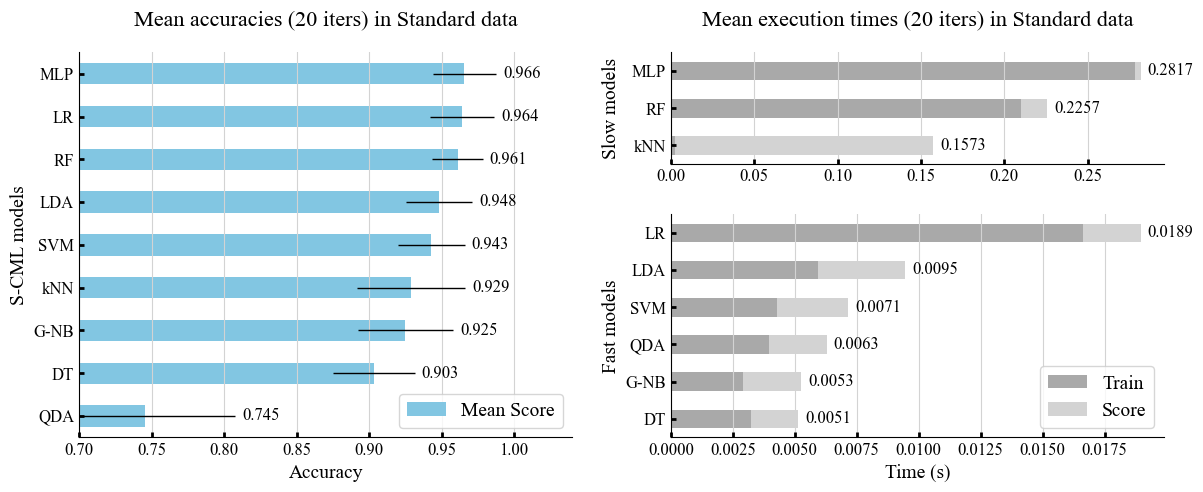

In [40]:
bar_analysis(fr_std, 'Standard', xlim=[0.7, 1.04], th=0.03, height_ratios=[3,6], ITER=20)

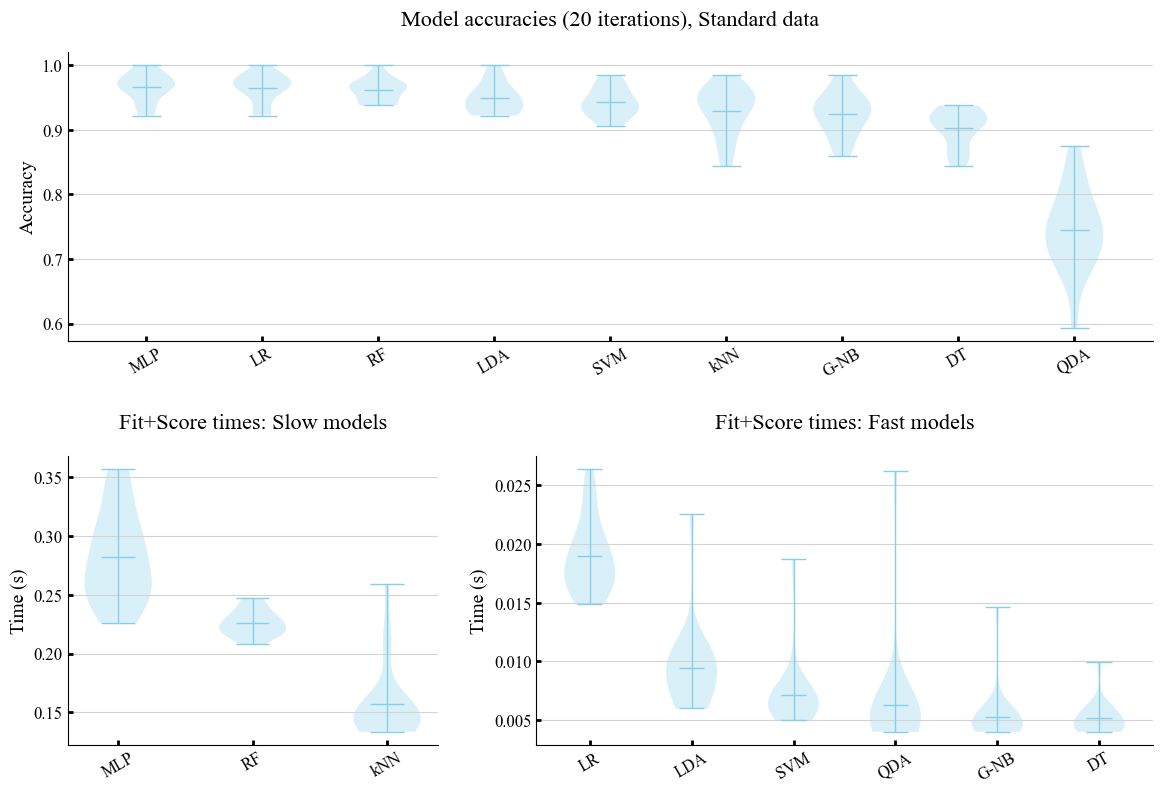

In [41]:
violin_analysis(model_data, 'Standard', width_ratios=(3,6))

➥ KNeighborsClassifier(): acc: 0.953125 mse: 0.140625 ▼
➥ GaussianNB(): acc: 0.921875 mse: 0.3125 ▼
➥ QuadraticDiscriminantAnalysis(): acc: 0.765625 mse: 0.84375 ▼
➥ LogisticRegression(): acc: 0.984375 mse: 0.0625 ▼
➥ SVC(): acc: 0.9375 mse: 0.328125 ▼
➥ DecisionTreeClassifier(): acc: 0.921875 mse: 0.3125 ▼
➥ RandomForestClassifier(): acc: 0.984375 mse: 0.0625 ▼
➥ MLPClassifier(): acc: 0.984375 mse: 0.0625 ▼
➥ LinearDiscriminantAnalysis(): acc: 0.96875 mse: 0.125 ▼


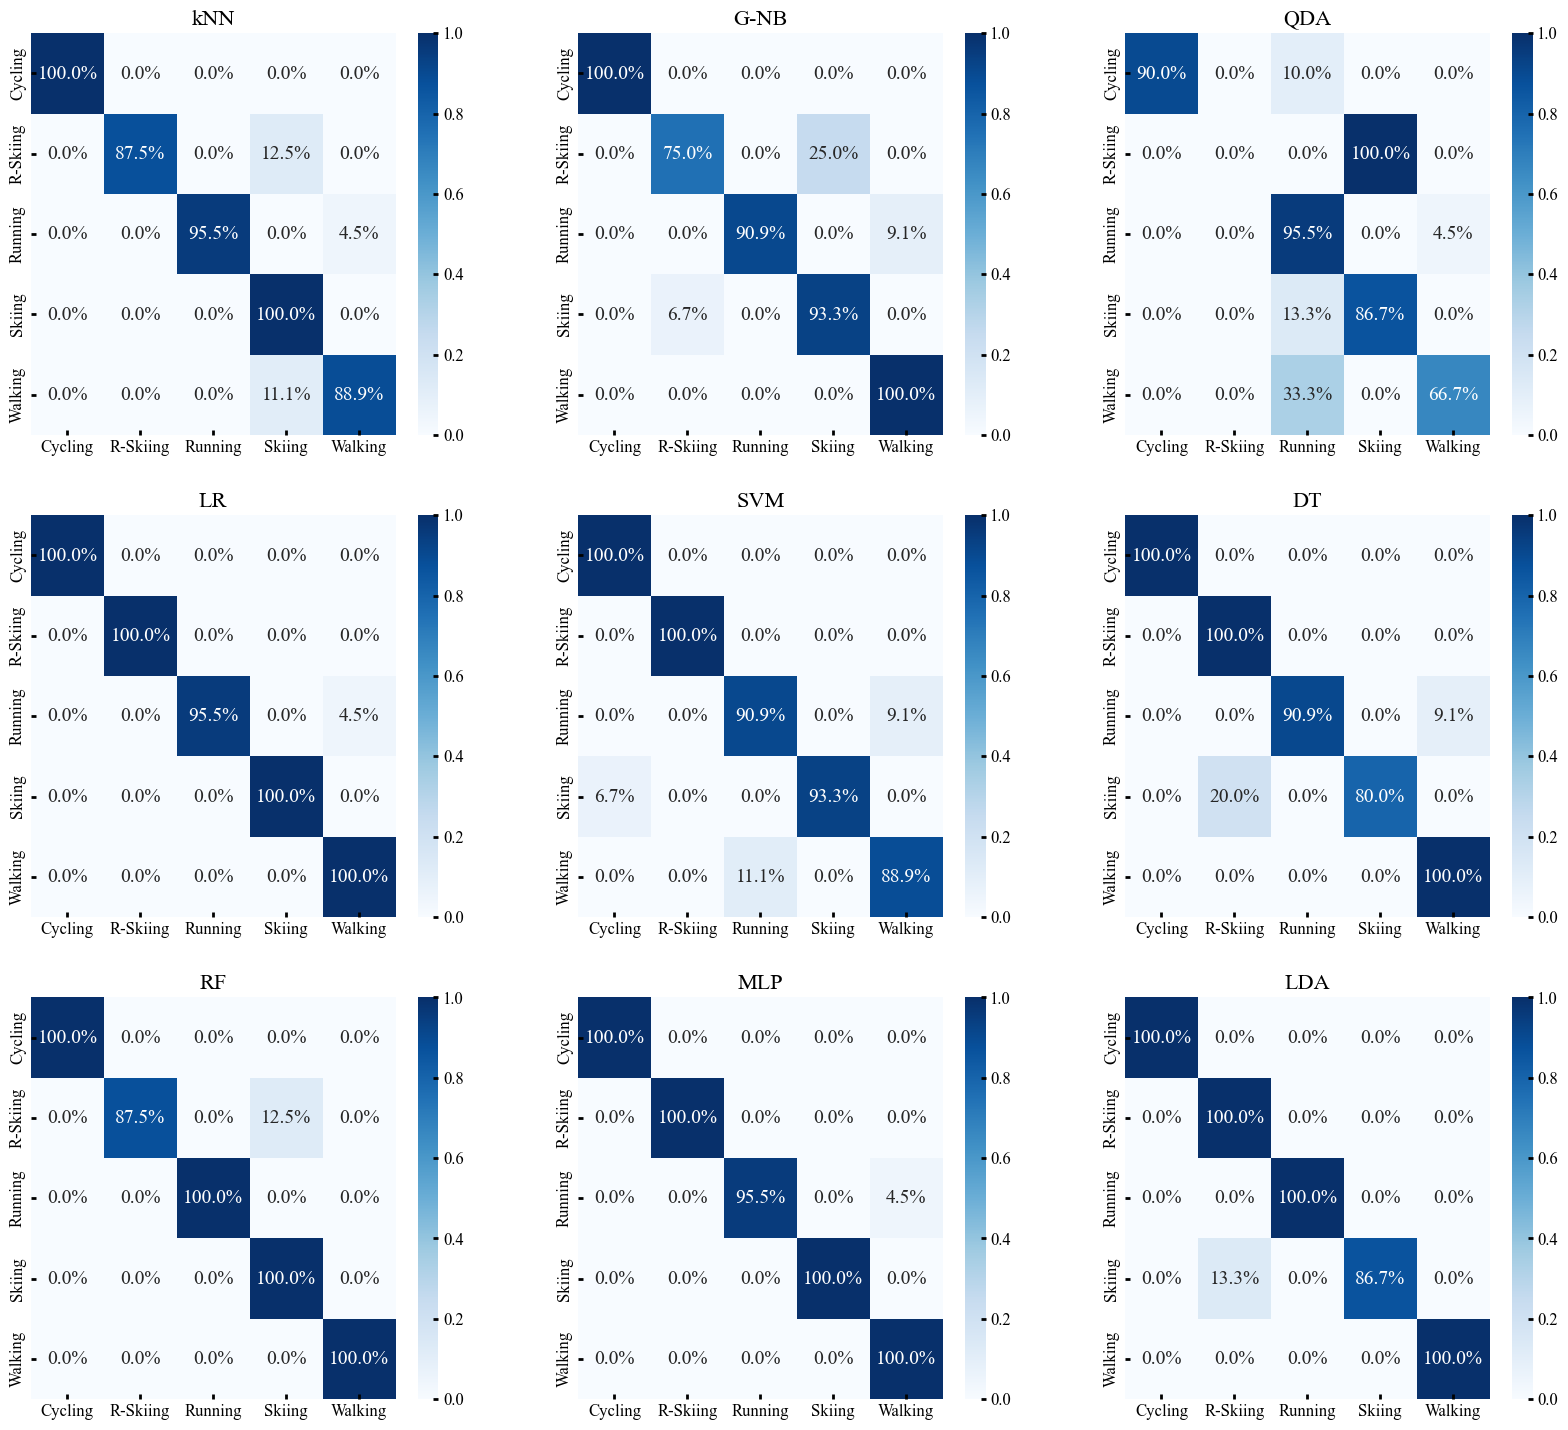

In [42]:
model_scores = classify_cf('Standard', classifiers, (X_std, y_std), rs=24, results=None, confmatrix=True)

In [43]:
model_scores

,Model,Datatype,Accuracy,F1
0,kNN,Standard,0.953125,0.953125
1,G-NB,Standard,0.921875,0.921875
2,QDA,Standard,0.765625,0.765625
3,LR,Standard,0.984375,0.984375
4,SVM,Standard,0.937500,0.937500
5,DT,Standard,0.921875,0.921875
6,RF,Standard,0.984375,0.984375
7,MLP,Standard,0.984375,0.984375
8,LDA,Standard,0.968750,0.968750


<a id="23"></a> <br>
###  [▲](#2) 2C - Classification in PCA data

In [44]:
X_pca = DF_sports_pca.iloc[:,:-1].copy()
y_pca = DF_sports_pca['target_names'].astype('category').cat.codes
X_train, X_test, y_train, y_test = splits(X_pca, y_pca, 42)

In [45]:
print(list(y_test.value_counts().sort_index()))

[10, 8, 22, 15, 9]


In [46]:
ITER = 20
fr_pca, model_data_pca = classify(classifiers, X_pca, y_pca, ITER) # Classify function does hold-out validation
fr_pca.sort_values(by=['Mean Score'], ascending=False)

,Model,Mean Score,Max,Min,score_std,mean_train_time,mean_score_time,total_time
3,LR,0.964063,1.000000,0.921875,0.022152,0.019342,0.002513,0.021855
7,MLP,0.957812,1.000000,0.921875,0.019200,0.513928,0.005558,0.519486
8,LDA,0.948438,1.000000,0.921875,0.022697,0.007087,0.003811,0.010898
4,SVM,0.942969,0.984375,0.906250,0.022791,0.005881,0.005082,0.010963
6,RF,0.932813,0.984375,0.890625,0.027108,0.388098,0.027852,0.415950
0,kNN,0.928906,0.984375,0.843750,0.037132,0.002713,0.142421,0.145134
1,G-NB,0.882812,0.937500,0.781250,0.038113,0.002510,0.002429,0.004938
5,DT,0.829688,0.921875,0.703125,0.047367,0.004354,0.002343,0.006697
2,QDA,0.791406,0.875000,0.687500,0.046686,0.003977,0.002976,0.006954


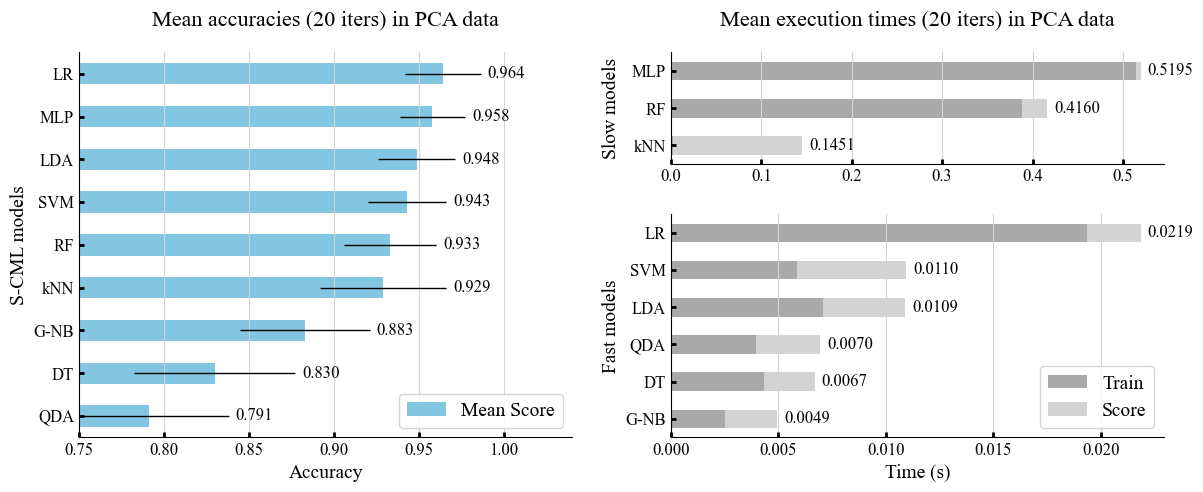

In [47]:
bar_analysis(fr_pca, 'PCA', xlim=[0.75, 1.04], th=0.03, height_ratios=[3,6], ITER=20)

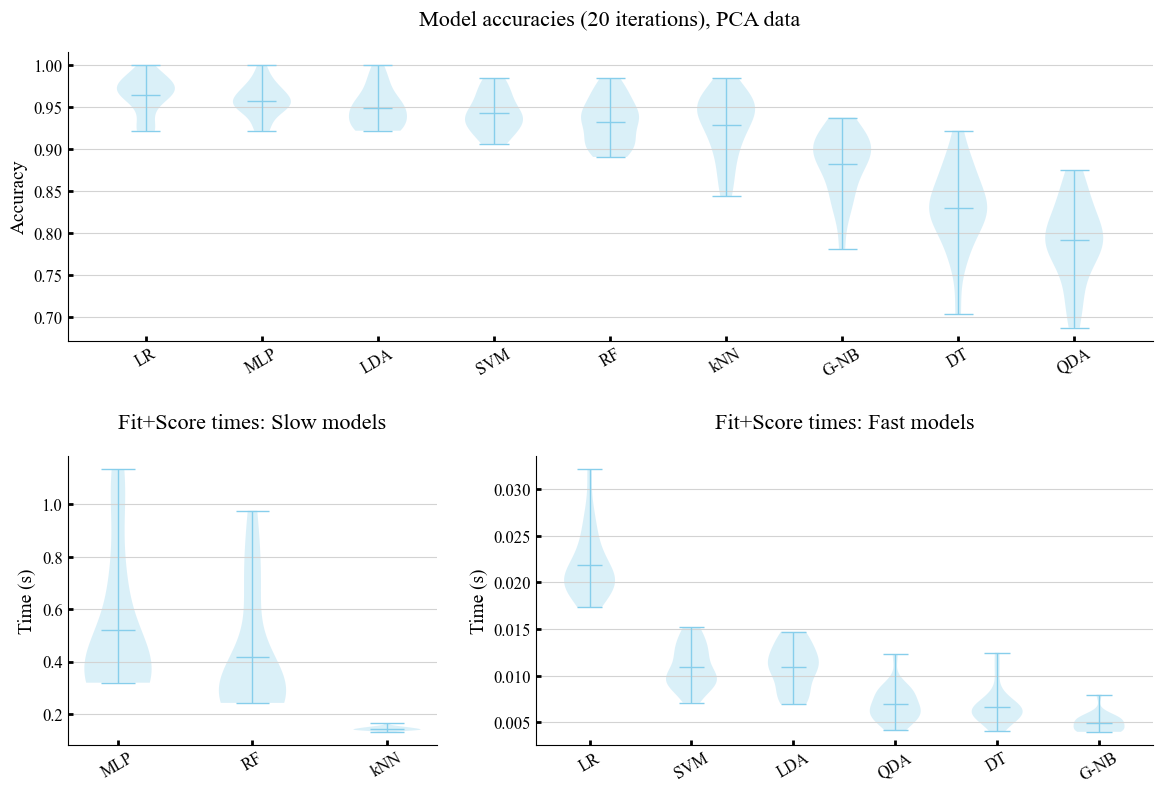

In [48]:
violin_analysis(model_data_pca, 'PCA', width_ratios=(3,6))

➥ KNeighborsClassifier(): acc: 0.953125 mse: 0.140625 ▼
➥ GaussianNB(): acc: 0.890625 mse: 0.46875 ▼
➥ QuadraticDiscriminantAnalysis(): acc: 0.6875 mse: 1.46875 ▼
➥ LogisticRegression(): acc: 0.984375 mse: 0.0625 ▼
➥ SVC(): acc: 0.9375 mse: 0.328125 ▼
➥ DecisionTreeClassifier(): acc: 0.828125 mse: 0.53125 ▼
➥ RandomForestClassifier(): acc: 0.953125 mse: 0.1875 ▼
➥ MLPClassifier(): acc: 0.96875 mse: 0.203125 ▼
➥ LinearDiscriminantAnalysis(): acc: 0.96875 mse: 0.125 ▼


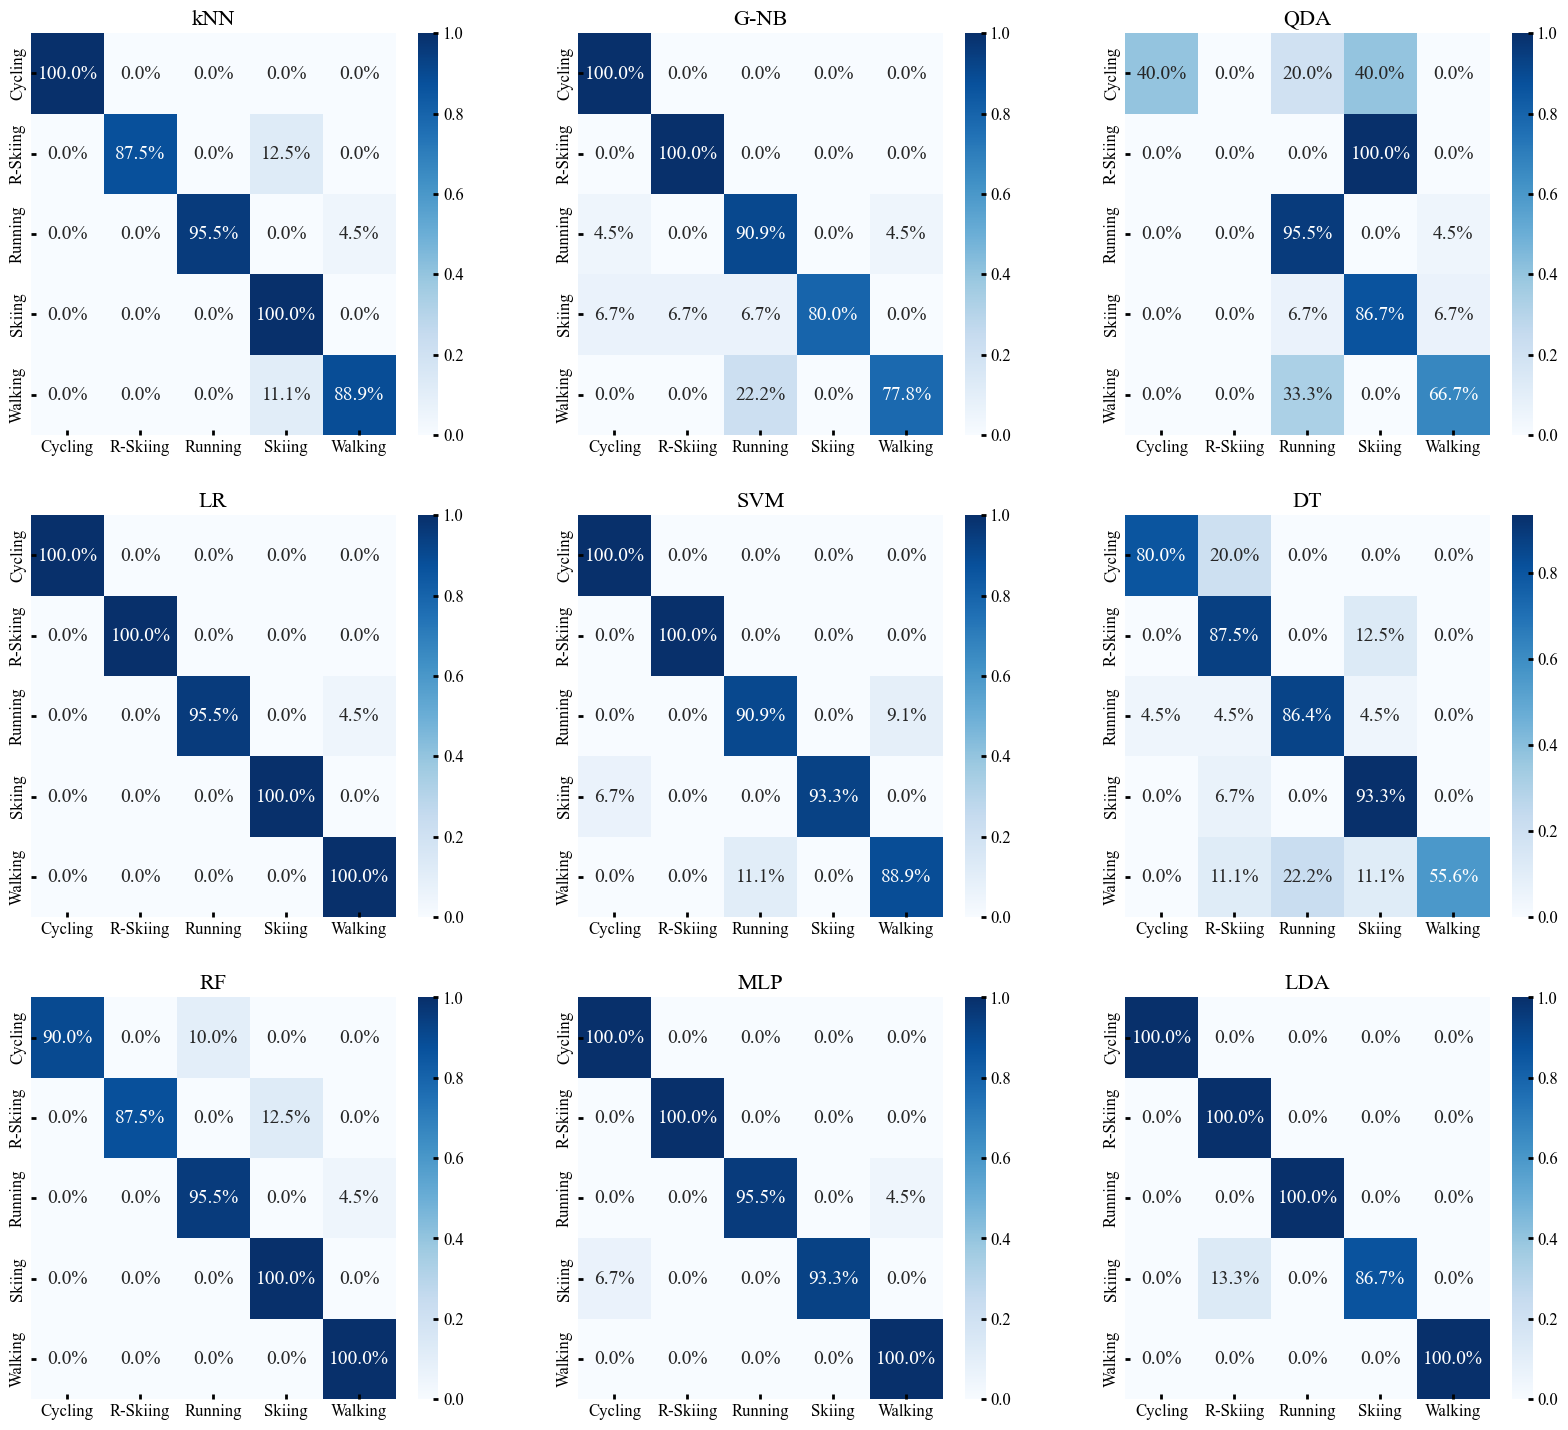

In [49]:
model_scores = classify_cf('PCA', classifiers, (X_pca, y_pca), rs=24, results=model_scores, confmatrix=True)

In [50]:
model_scores

,Model,Datatype,Accuracy,F1
0,kNN,Standard,0.953125,0.953125
1,G-NB,Standard,0.921875,0.921875
2,QDA,Standard,0.765625,0.765625
3,LR,Standard,0.984375,0.984375
4,SVM,Standard,0.937500,0.937500
5,DT,Standard,0.921875,0.921875
6,RF,Standard,0.984375,0.984375
7,MLP,Standard,0.984375,0.984375
8,LDA,Standard,0.968750,0.968750
9,kNN,PCA,0.953125,0.953125


In [51]:
model_scores.groupby('Model').mean(numeric_only=True).sort_values(by='Accuracy', ascending=False)

,Accuracy,F1
Model,,
LR,0.984375,0.984375
MLP,0.976562,0.976562
LDA,0.968750,0.968750
RF,0.968750,0.968750
kNN,0.953125,0.953125
SVM,0.937500,0.937500
G-NB,0.906250,0.906250
DT,0.875000,0.875000
QDA,0.726562,0.726562


<a id="24"></a> <br>
###  [▲](#2) 2D - Model hyperparameter optimization (Disabled)

Results are saved into file - Analysis can be made in that data

In [52]:
# Data splits for std
X_std = DF_sports_std.iloc[:,:-1].copy()
y_std = DF_sports_std.target_names.cat.codes
X_train_std, X_test_std, y_train_std, y_test_std = splits(X_std, y_std, rs=0)
# Data splits for pca
X_pca = DF_sports_pca.iloc[:,:-1].copy()
y_pca = DF_sports_pca['target_names'].astype('category').cat.codes
X_train_pca, X_test_pca, y_train_pca, y_test_pca = splits(X_pca, y_pca, rs=0)

In [53]:
classifiers

{'kNN': KNeighborsClassifier(),
 'G-NB': GaussianNB(),
 'QDA': QuadraticDiscriminantAnalysis(),
 'LR': LogisticRegression(),
 'SVM': SVC(),
 'DT': DecisionTreeClassifier(),
 'RF': RandomForestClassifier(),
 'MLP': MLPClassifier(),
 'LDA': LinearDiscriminantAnalysis()}

In [54]:
params = {
    'kNN'   : {'n_neighbors': np.arange(1,15), 
               'weights':['uniform', 'distance']},
    'G-NB'  : {'var_smoothing': np.logspace(0,-9, num=100)},
    'QDA'   : {'reg_param': (0.001, 0.01, 0.1, 1.0), 
               'store_covariance': (True, False),
               'tol': (0.00001, 0.0001, 0.001, 0.01)},
    'LR'    : {'C': np.logspace(-4, 4, 50),
               'penalty': ['l1', 'l2']},
    'SVM'   : {'C': [ 0.1, 1, 10, 100, 1000], 
               'gamma': [3, 2, 1, 0.1, 0.01],
               'kernel': ['poly', 'rbf', 'sigmoid','linear']},
    'DT'    : {'criterion':['gini','entropy'],
               'max_depth': np.arange(3, 15),
               'splitter': ['best','random']}, # default is 'best'
    'RF'    : {'n_estimators': [10, 20, 30],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5, 10, 15, 20],
               'min_samples_split': [2, 5, 10, 20]},
    'MLP'   : {'hidden_layer_sizes': [(10,30,10),(20,),(50,)], 
               'activation': ['relu'],
               'solver': ['sgd', 'adam'],
               'alpha': [0.0001, 0.001, 0.01],
               'learning_rate': ['constant','adaptive']},
    'LDA'   : {'solver': ['lsqr','eigen'],
               'shrinkage': ['auto', None]}
}

In [55]:
datasets = [{'dstype':'Standard','X':X_std,'y':y_std},
            {'dstype':'PCA','X':X_pca,'y':y_pca}]

In [56]:
#opt_results = optimize_classify(classifiers, params, 20)

Save parameters and results into file (Disabled)

In [57]:
#opt_results.to_csv('DATA/results_S-CML/opt_results', index=False)

In [58]:
# Here we suppose, that models are in original order in the dataframe
#ind = len(classifiers)
#param_set_std = dict(zip(opt_results.iloc[:ind,0], opt_results.iloc[:ind,1]))
#param_set_pca = dict(zip(opt_results.iloc[ind:,0], opt_results.iloc[ind:,1]))

In [59]:
#pd.DataFrame(data=param_set_std).to_json('setup/opt_params_std')
#pd.DataFrame(data=param_set_pca).to_json('setup/opt_params_pca')

<a id="25"></a> <br>
###  [▲](#2) 2E - Classification with optimal parameters

#### 2E.1 - Confusion matrixes with optimal hyperparameters

Set hyperparameters from a file

In [60]:
opt_params_std = pd.read_json('./setup/opt_params_std', typ='dict')
opt_params_pca = pd.read_json('./setup/opt_params_pca', typ='dict')

# Clean unnecessary None value parameters generated when saving dictionaries to a files
for name, dic in opt_params_std.items():
    opt_params_std[name] = {k:v for k,v in dic.items() if v is not None}
    
for name, dic in opt_params_pca.items():
    opt_params_pca[name] = {k:v for k,v in dic.items() if v is not None}

In [61]:
opt_classifiers = set_model_params(classifiers, opt_params_std)

➥ KNeighborsClassifier(n_neighbors=3, weights='distance'): acc: 0.984375 mse: 0.0625 ▼
➥ GaussianNB(var_smoothing=0.0008111308): acc: 0.921875 mse: 0.3125 ▼
➥ QuadraticDiscriminantAnalysis(reg_param=0.01, store_covariance=True, tol=1e-05): acc: 0.96875 mse: 0.125 ▼
➥ LogisticRegression(C=0.5689866029): acc: 0.96875 mse: 0.125 ▼
➥ SVC(C=1, gamma=3, kernel='linear'): acc: 0.96875 mse: 0.125 ▼
➥ DecisionTreeClassifier(max_depth=9, splitter='random'): acc: 0.90625 mse: 0.375 ▼
➥ RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=20): acc: 0.96875 mse: 0.125 ▼
➥ MLPClassifier(hidden_layer_sizes=[50]): acc: 0.984375 mse: 0.0625 ▼
➥ LinearDiscriminantAnalysis(solver='lsqr'): acc: 0.96875 mse: 0.125 ▼


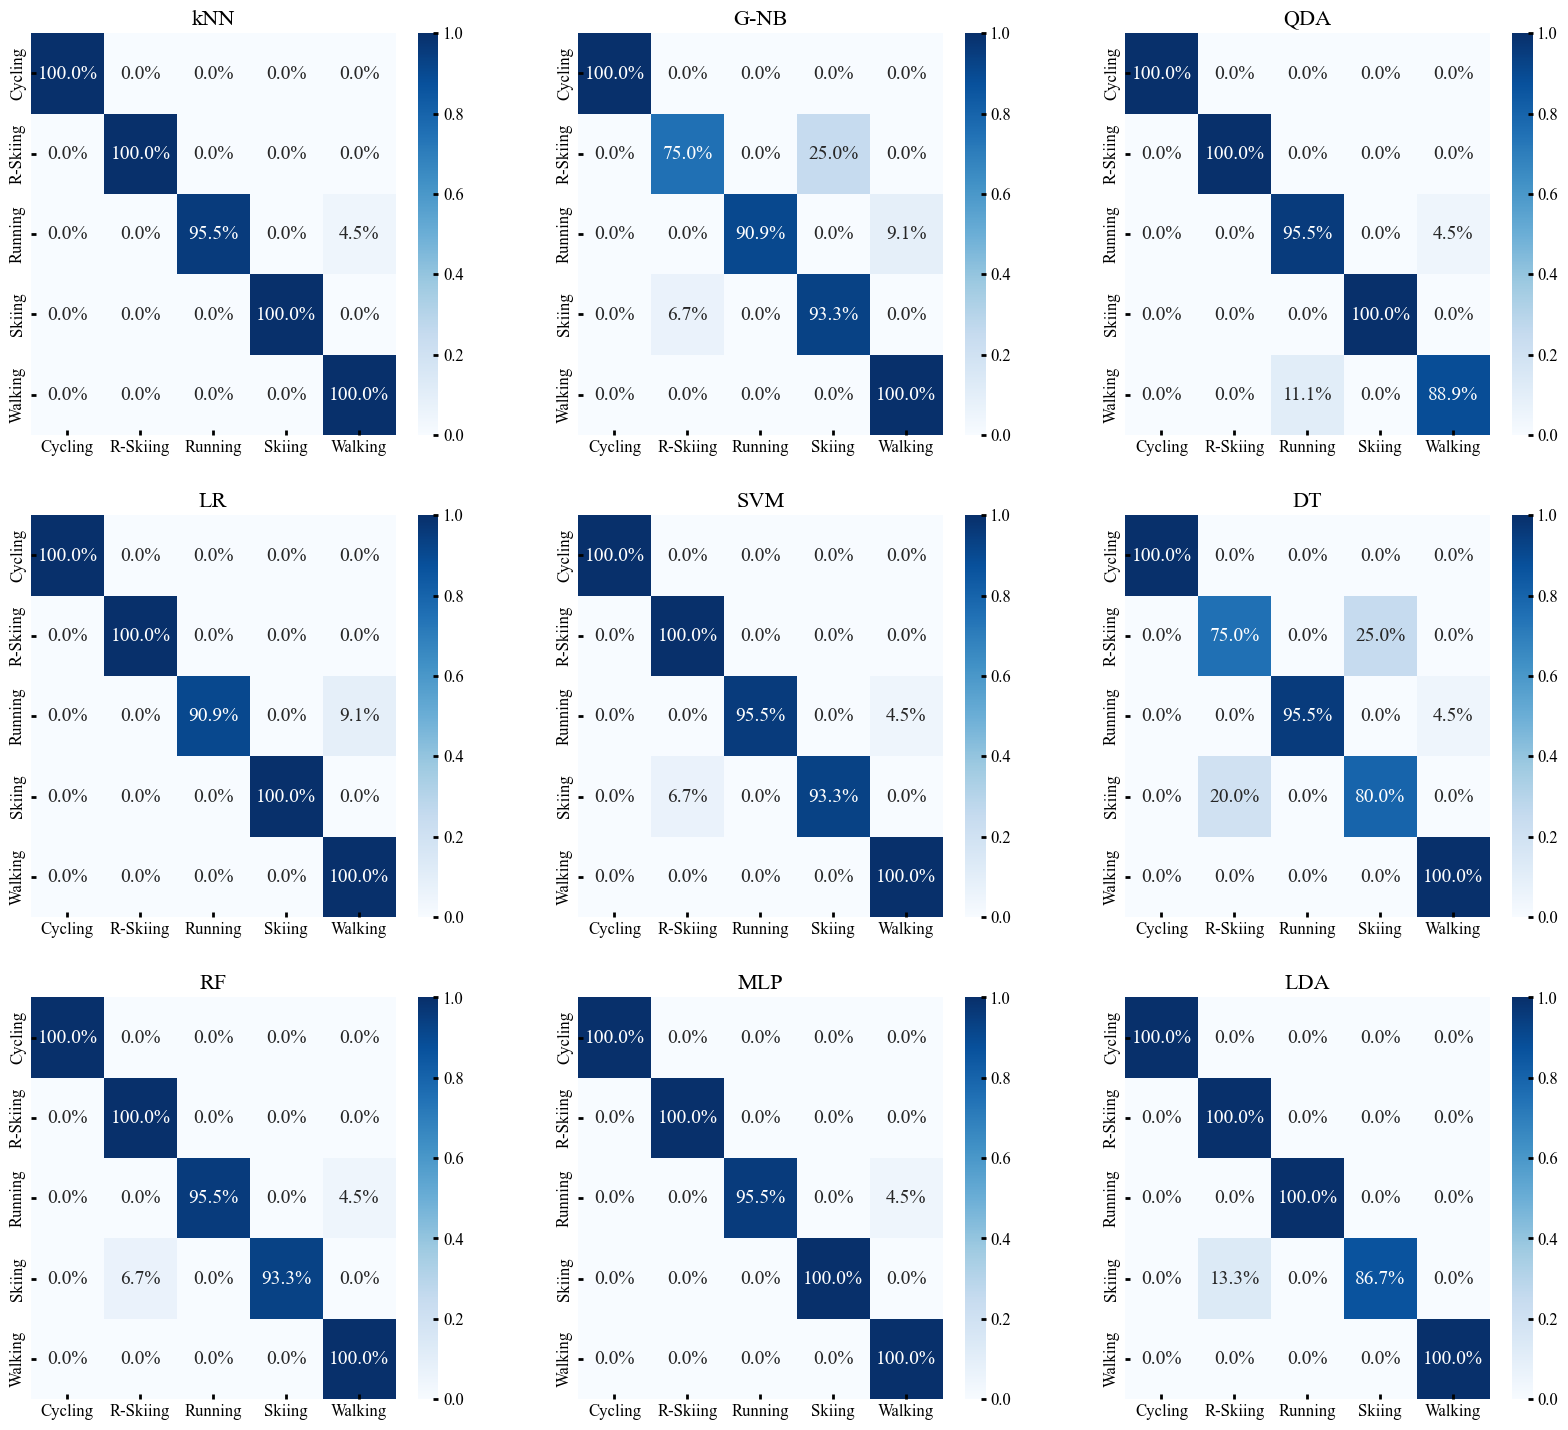

,Model,Datatype,Accuracy,F1
5,DT,Standard,0.906250,0.906250
1,G-NB,Standard,0.921875,0.921875
2,QDA,Standard,0.968750,0.968750
3,LR,Standard,0.968750,0.968750
4,SVM,Standard,0.968750,0.968750
6,RF,Standard,0.968750,0.968750
8,LDA,Standard,0.968750,0.968750
0,kNN,Standard,0.984375,0.984375
7,MLP,Standard,0.984375,0.984375


In [62]:
classify_cf('Standard', opt_classifiers, (X_std, y_std), 24, None, True).sort_values(by='Accuracy')

In [63]:
#opt_classifiers = set_modelparams(classifiers, opt_params_pca)
#classify_cf('PCA', opt_clfs_pca, (X_pca, y_pca), 24, None, True).sort_values(by='Accuracy')

#### 2E.2 - Iterative classification with optimal hyperparameters

**Iterative classification**

In [64]:
ITER = 20
fr_opt, model_data_opt = classify(opt_classifiers, X_std, y_std, ITER) # Classify function does hold-out validation
fr_opt.sort_values(by=['Mean Score'], ascending=False)

,Model,Mean Score,Max,Min,score_std,mean_train_time,mean_score_time,total_time
4,SVM,0.971875,1.000000,0.937500,0.020729,0.003088,0.001957,0.005046
3,LR,0.963281,1.000000,0.921875,0.021123,0.013452,0.002051,0.015503
0,kNN,0.962500,1.000000,0.921875,0.022317,0.004960,0.144415,0.149376
6,RF,0.957812,0.984375,0.921875,0.018554,0.045423,0.004993,0.050415
7,MLP,0.954688,0.984375,0.890625,0.027466,0.197716,0.002827,0.200544
8,LDA,0.947656,1.000000,0.906250,0.023838,0.004308,0.002930,0.007238
2,QDA,0.939844,0.984375,0.859375,0.028502,0.003164,0.002309,0.005473
5,DT,0.928125,0.984375,0.859375,0.032924,0.002084,0.001714,0.003799
1,G-NB,0.925000,0.984375,0.843750,0.037824,0.003581,0.003014,0.006595


Horizontal bar chart

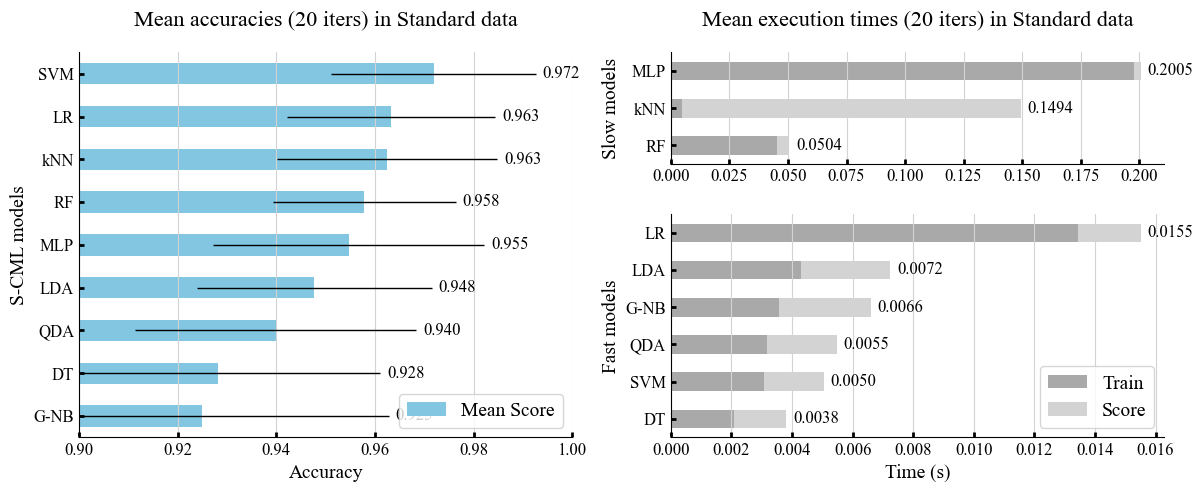

In [65]:
bar_analysis(fr_opt, 'Standard', xlim=[0.90, 1.0], th=0.03, height_ratios=[3,6], ITER=20)

Violin plot

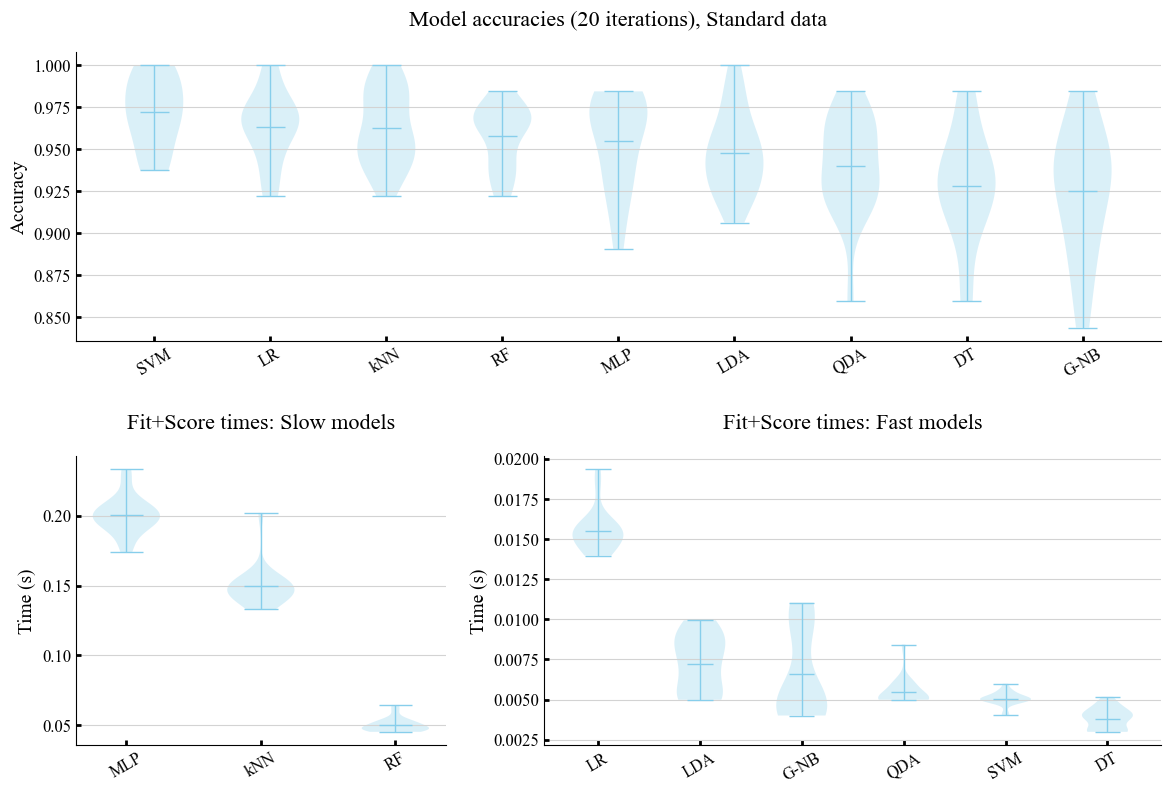

In [66]:
violin_analysis(model_data_opt, 'Standard', width_ratios=(3,6))

<a id="26"></a> <br>
###  [▲](#2) 2F - Summary analysis

#### 2F.1 Numerical analysis

In [67]:
opt_results = pd.read_csv('DATA/results_S-CML/opt_results')

In [68]:
opt_results

,Model,Hyperparameters,Mean Score,Best Score,Min Score,Score std,Train time,Score time,Total time
0,kNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.954688,0.984375,0.906250,0.021481,0.004133,0.139710,0.143843
1,G-NB,{'var_smoothing': 0.0008111308307896872},0.924219,0.984375,0.859375,0.035381,0.002688,0.001911,0.004599
2,QDA,"{'reg_param': 0.01, 'store_covariance': True, ...",0.937500,0.984375,0.859375,0.027951,0.003101,0.002074,0.005175
3,LR,"{'C': 0.5689866029018293, 'penalty': 'l2'}",0.964844,1.000000,0.921875,0.019687,0.013394,0.001713,0.015107
4,SVM,"{'C': 1, 'gamma': 3, 'kernel': 'linear'}",0.966406,1.000000,0.937500,0.019311,0.003089,0.002205,0.005294
5,DT,"{'criterion': 'gini', 'max_depth': 9, 'splitte...",0.926562,0.984375,0.875000,0.025243,0.002466,0.001725,0.004192
6,RF,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.950781,1.000000,0.875000,0.024344,0.053932,0.005852,0.059784
7,MLP,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.948438,1.000000,0.843750,0.034623,0.175306,0.002736,0.178042
8,LDA,"{'shrinkage': None, 'solver': 'lsqr'}",0.946094,1.000000,0.906250,0.025424,0.005651,0.002911,0.008562
9,kNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.954688,0.984375,0.906250,0.021481,0.016326,0.461761,0.478087


In [69]:
# Let's put pandas in order by force :)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
results = pd.concat([model_scores.iloc[:len(classifiers)*2,:], opt_results.iloc[:,1:]], axis=1)
results['Model'] = opt_results['Model']
results_std = results[results['Datatype']=='Standard'].set_index('Model')
results_pca = results[results['Datatype']=='PCA'].set_index('Model')
results_std.drop(['Datatype','Accuracy','F1'], axis=1, inplace=True)
results_pca.drop(['Datatype','Accuracy','F1'], axis=1, inplace=True)

Standard

In [70]:
results_std.sort_values(by=['Mean Score','Best Score'], ascending=False)

,Hyperparameters,Mean Score,Best Score,Min Score,Score std,Train time,Score time,Total time
Model,,,,,,,,
SVM,"{'C': 1, 'gamma': 3, 'kernel': 'linear'}",0.966,1.000,0.938,0.019,0.003,0.002,0.005
LR,"{'C': 0.5689866029018293, 'penalty': 'l2'}",0.965,1.000,0.922,0.020,0.013,0.002,0.015
kNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.955,0.984,0.906,0.021,0.004,0.140,0.144
RF,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}",0.951,1.000,0.875,0.024,0.054,0.006,0.060
MLP,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}",0.948,1.000,0.844,0.035,0.175,0.003,0.178
LDA,"{'shrinkage': None, 'solver': 'lsqr'}",0.946,1.000,0.906,0.025,0.006,0.003,0.009
QDA,"{'reg_param': 0.01, 'store_covariance': True, 'tol': 1e-05}",0.938,0.984,0.859,0.028,0.003,0.002,0.005
DT,"{'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}",0.927,0.984,0.875,0.025,0.002,0.002,0.004
G-NB,{'var_smoothing': 0.0008111308307896872},0.924,0.984,0.859,0.035,0.003,0.002,0.005


PCA (21 most important explained variance components)

In [71]:
results_pca.sort_values(by=['Mean Score','Best Score'], ascending=False)

,Hyperparameters,Mean Score,Best Score,Min Score,Score std,Train time,Score time,Total time
Model,,,,,,,,
SVM,"{'C': 1, 'gamma': 3, 'kernel': 'linear'}",0.966,1.000,0.938,0.019,0.009,0.005,0.014
LR,"{'C': 0.5689866029018293, 'penalty': 'l2'}",0.965,1.000,0.922,0.020,0.044,0.005,0.049
MLP,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}",0.958,1.000,0.922,0.024,0.857,0.012,0.869
kNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.955,0.984,0.906,0.021,0.016,0.462,0.478
LDA,"{'shrinkage': None, 'solver': 'lsqr'}",0.948,1.000,0.906,0.024,0.019,0.010,0.029
QDA,"{'reg_param': 0.01, 'store_covariance': True, 'tol': 1e-05}",0.939,0.984,0.859,0.028,0.009,0.006,0.015
RF,"{'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 30}",0.918,0.984,0.844,0.033,0.170,0.018,0.188
G-NB,{'var_smoothing': 0.01},0.883,0.953,0.781,0.041,0.008,0.007,0.014
DT,"{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}",0.851,0.953,0.734,0.055,0.007,0.005,0.012


**Note that in current dataset with approx. 200 rows using 30% test split, accuracy of:**
- 0.984 means 1 mistake
- 0.969 means 2 mistakes
- 0.953 means 3 mistakes
- 0.938 means 4 mistakes

**And therefore there might be quite big drops in accuracy, but the situation is still not that bad.**

In [72]:
results_std = results[results['Datatype']=='Standard'] # This allows several runs without problems
results_std.drop(['Datatype','F1'], axis=1, inplace=True)
results_std = results_std.rename(columns={'Accuracy':'Default Acc', 
                                          'Score time':'Score time (ms)',
                                          'Train time':'Train time (s)',
                                          'Total time':'Total time (s)'})

results_std['Score time (ms)'] = results_std['Score time (ms)'] * 1000 # Convertion to milliseconds
grouped = results_std.groupby(['Model']).mean().sort_values(by='Mean Score', ascending=False)
grouped.style.format(precision=3)
grouped.style.set_properties(subset=['Mean Score'], **{'font-weight': 'bold'})

,Default Acc,Mean Score,Best Score,Min Score,Score std,Train time (s),Score time (ms),Total time (s)
Model,,,,,,,,
SVM,0.937500,0.966406,1.000000,0.937500,0.019311,0.003089,2.205396,0.005294
LR,0.984375,0.964844,1.000000,0.921875,0.019687,0.013394,1.712756,0.015107
kNN,0.953125,0.954688,0.984375,0.906250,0.021481,0.004133,139.710069,0.143843
RF,0.984375,0.950781,1.000000,0.875000,0.024344,0.053932,5.852056,0.059784
MLP,0.984375,0.948438,1.000000,0.843750,0.034623,0.175306,2.735698,0.178042
LDA,0.968750,0.946094,1.000000,0.906250,0.025424,0.005651,2.910972,0.008562
QDA,0.765625,0.937500,0.984375,0.859375,0.027951,0.003101,2.073698,0.005175
DT,0.921875,0.926562,0.984375,0.875000,0.025243,0.002466,1.725352,0.004192
G-NB,0.921875,0.924219,0.984375,0.859375,0.035381,0.002688,1.910748,0.004599


#### 2F.2 Visual analysis

Pivot table for data visualization

In [73]:
results.pivot(index='Model', 
              columns='Datatype', 
              values=['Mean Score', 'Score std'])

Mean Score          Score std         
Datatype    PCA     Standard    PCA    Standard
Model                                          
DT          0.851     0.927     0.055    0.025 
G-NB        0.883     0.924     0.041    0.035 
LDA         0.948     0.946     0.024    0.025 
LR          0.965     0.965     0.020    0.020 
MLP         0.958     0.948     0.024    0.035 
QDA         0.939     0.938     0.028    0.028 
RF          0.918     0.951     0.033    0.024 
SVM         0.966     0.966     0.019    0.019 
kNN         0.955     0.955     0.021    0.021

Results by datatype

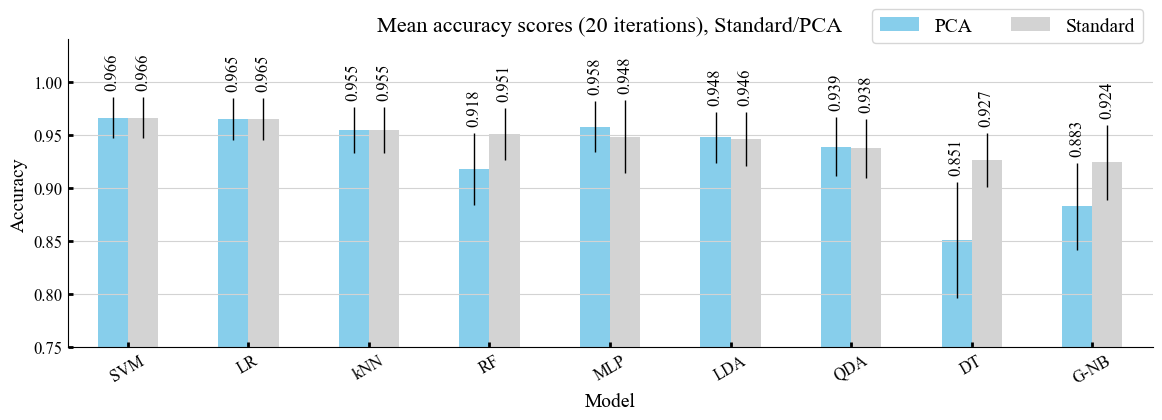

In [74]:
pivot = results.pivot(index='Model', columns='Datatype', values=['Mean Score', 'Score std'])
pivot = pivot.sort_values(by=('Mean Score','Standard'), ascending=False)
#pivot = pivot.reindex(columns=['PCA','Standard'])
ax = pivot['Mean Score'].plot(figsize=(14,4), 
                kind='bar', 
                ylim=(0.75,1.04), 
                yerr=pivot['Score std']
                )
ax.set_title("Mean accuracy scores (" + str(ITER) + " iterations), Standard/PCA")
ax.set_xticks(np.arange(0,pivot.shape[0]), pivot.index.values, rotation=30, horizontalalignment='center')
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.13), ncol=2, title='')
ax.set_ylabel("Accuracy")
ax.grid(axis='y')
# This avoids extra weird printing on the screen
text = ax.bar_label(ax.containers[1], fmt='%.3f', label_type='edge', padding=5, fontsize=12, rotation=90)
text = ax.bar_label(ax.containers[3], fmt='%.3f', label_type='edge', padding=5, fontsize=12, rotation=90)

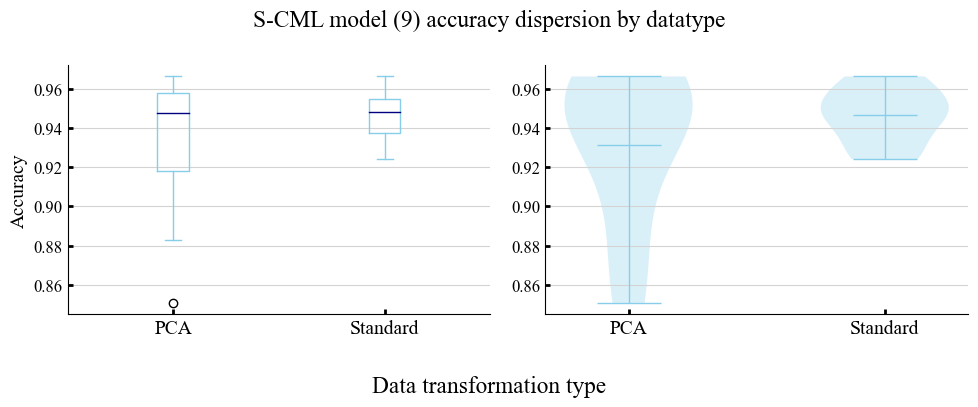

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'width_ratios': [1, 1]}, tight_layout=True)
fig.suptitle('S-CML model ('+ str(results_std.shape[0]) + ') accuracy dispersion by datatype')
fig.supxlabel('Data transformation type')

pivot['Mean Score'].plot(kind='box', showfliers=True, ax=ax1)
ax1.set_ylabel('Accuracy')
ax1.set_xticks([1,2], labels=['PCA','Standard'], fontsize=14)
ax1.grid(axis='y')

ax2.violinplot(pivot['Mean Score'], showmeans=True)
ax2.set_xticks([1,2], labels=['PCA','Standard'], fontsize=14)
ax2.grid(axis='y')

<div style="display: block; padding: 15px; background-color: lightgreen; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 26px;"><b>Execution Information</b></h3>
    <p>Works only when the whole file is executed from start to this point</p>
</div>

In [76]:
run_end = datetime.datetime.now()
run_time = run_end - run_start
print('File execution info:')
print('Start\t', run_start)
print('End\t', run_end)
print('Runtime\t', str(run_time))

File execution info:
Start	 2023-05-31 12:34:25.138801
End	 2023-05-31 12:36:44.964239
Runtime	 0:02:19.825438
